# **Hotel Booking Analysis**

# **1.  Data Cleaning and Preprocessing**

In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loabding Dataset
df =pd.read_csv("hotel_bookings.csv")

In [5]:
# Dataset First Look
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [6]:
#Last five observations
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[5 rows x 32 columns]

### <u>**Dataset Inispection**<u>

In [8]:
#check the shape of dataset
df.shape

(119390, 32)

### *Dataset having 119390 observations and 32 varibles*

In [10]:
# Columns names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
#Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### *Features children, country, company and agent are having null values*

### <u>**Handling Duplicate Values**<u>

In [14]:
#checking for duplicate values
df.duplicated().sum()

31994

In [15]:
#Remove duplicate values
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

### *Dataset having 31994 duplicate values and those are successfully removed* ###

In [18]:
# Checking for new shape of dataset
df.shape

(87396, 32)

### <u>**Handling Missing/Null Values**<u>

In [20]:
# Check for missing/null values in Dataset
null_df = df.isna().sum().to_frame(name='number_of_null_values')
null_df

number_of_null_values
hotel                                               0
is_canceled                                         0
lead_time                                           0
arrival_date_year                                   0
arrival_date_month                                  0
arrival_date_week_number                            0
arrival_date_day_of_month                           0
stays_in_weekend_nights                             0
stays_in_week_nights                                0
adults                                              0
children                                            4
babies                                              0
meal                                                0
country                                           452
market_segment                                      0
distribution_channel                                0
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_canceled                      0
reserved_room_type                                  0
assigned_room_type                                  0
booking_changes                                     0
deposit_type                                        0
agent                                           12193
company                                         82137
days_in_waiting_list                                0
customer_type                                       0
adr                                                 0
required_car_parking_spaces                         0
total_of_special_requests                           0
reservation_status                                  0
reservation_status_date                             0

### Null values for the features children, country, agent, and company are 4, 452, 12193, and 82137, respectively.

<Figure size 700x700 with 0 Axes>

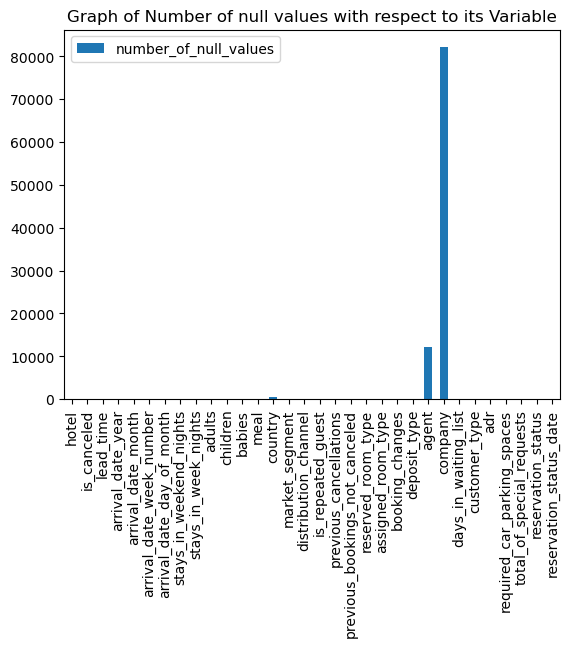

In [22]:
# Ploting number of null values with its variable
plt.figure(figsize=(7,7))
null_df.plot(kind='bar')
plt.title('Graph of Number of null values with respect to its Variable')
plt.show()

In [23]:
# Percentage of null values
percentage_null_df = df.isna().mean().round(4) * 100
percentage_null_df = percentage_null_df.to_frame(name='percentage_null_values')
percentage_null_df


percentage_null_values
hotel                                             0.00
is_canceled                                       0.00
lead_time                                         0.00
arrival_date_year                                 0.00
arrival_date_month                                0.00
arrival_date_week_number                          0.00
arrival_date_day_of_month                         0.00
stays_in_weekend_nights                           0.00
stays_in_week_nights                              0.00
adults                                            0.00
children                                          0.00
babies                                            0.00
meal                                              0.00
country                                           0.52
market_segment                                    0.00
distribution_channel                              0.00
is_repeated_guest                                 0.00
previous_cancellations                            0.00
previous_bookings_not_canceled                    0.00
reserved_room_type                                0.00
assigned_room_type                                0.00
booking_changes                                   0.00
deposit_type                                      0.00
agent                                            13.95
company                                          93.98
days_in_waiting_list                              0.00
customer_type                                     0.00
adr                                               0.00
required_car_parking_spaces                       0.00
total_of_special_requests                         0.00
reservation_status                                0.00
reservation_status_date                           0.00

#### Children, country, agent, and company variables have null values of 0.0046%, 0.5172%, 13.9514%, and 93.9826%, respectively. Variable companies having more than 50% null values

In [25]:
#checking category of features whoes having null values
df.country.value_counts()

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [26]:
df.agent.value_counts()

agent
9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64

In [27]:
df.children.value_counts()

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [28]:
df.company.value_counts()

company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: count, Length: 352, dtype: int64

In [29]:
# Dropping variable having more than 50% null values
df.drop(columns='company', inplace=True)

In [30]:
# Replacing null values with the most frequent value in a variable
df['children']=df['children'].fillna(df['children'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])
df['agent']=df['agent'].fillna(df['agent'].mode()[0])

#### From above, children, country, and agent are discrete numerical variables, so replaced null values with modes, and the variable company had null values greater than 50%, so removed it.

In [32]:
# Check for null values are removed
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [33]:
df.shape

(87396, 31)

### All the null values have been successfully removed.

In [35]:
# Besic statistical description fo Dataset
df.describe()

is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     79.891368        2016.210296   
std        0.446466     86.052325           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87396.000000          87396.000000  87396.000000   
mean                  1.005263              2.625395      1.875795   
std                   1.031921              2.053584      0.626500   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87396.000000  87396.000000       87396.000000            87396.000000   
mean       0.138633      0.010824           0.039075                0.030413   
std        0.455871      0.113597           0.193775                0.369145   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    87396.000000     87396.000000  87396.000000   
mean                         0.183990         0.271603     82.260287   
std                          1.731894         0.727245    109.061182   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000      9.000000   
75%                          0.000000         0.000000    234.000000   
max                         72.000000        21.000000    535.000000   

       days_in_waiting_list           adr  required_car_parking_spaces  \
count          87396.000000  87396.000000                 87396.000000   
mean               0.749565    106.337246                     0.084226   
std               10.015731     55.013953                     0.281533   
min                0.000000     -6.380000                     0.000000   
25%                0.000000     72.000000                     0.000000   
50%                0.000000     98.100000                     0.000000   
75%                0.000000    134.000000                     0.000000   
max              391.000000   5400.000000                     8.000000   

       total_of_special_requests  
count               87396.000000  
mean                    0.698567  
std                     0.831946  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.00000

### <u>**Handling Outliers**<u>

#### ***Categorical veriables***

In [38]:
categorical_variables = []
for i in df.columns:
    if df[i].dtypes == 'O':
        categorical_variables.append(i)
print('Dataset having ' + str(len(categorical_variables)) + ' categorical variables')
print("-----------------------------------------------------------------")
print(categorical_variables)

Dataset having 12 categorical variables
-----------------------------------------------------------------
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


#### Dataset having 12 categorical variables.

### ***Numerical variables***

In [41]:
numerical_variables = []
for col in df.columns:
    if df[col].dtypes != 'O':
        numerical_variables.append(col)
print('There are' ,len(numerical_variables), 'numerical variables.')
print("-------------------------------------------------------------")
print(numerical_variables)

There are 19 numerical variables.
-------------------------------------------------------------
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


#### There are 19 numerical variables.

In [43]:
# Obtaining Descrete varibles from Numerical varibles
# Variables having less than 150 categories are consider as descrete variable
discrete_variables = []
for col_name in numerical_variables:
    if len(df[col_name].value_counts()) <= 150:
        discrete_variables.append(col_name)
        print(f'{col_name}: {df[col_name].unique()}')
        print('-----------------------------------------------------------')
print('Dataset has',len(discrete_variables) ,'discrete variables.')

is_canceled: [0 1]
-----------------------------------------------------------
arrival_date_year: [2015 2016 2017]
-----------------------------------------------------------
arrival_date_week_number: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
-----------------------------------------------------------
arrival_date_day_of_month: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
-----------------------------------------------------------
stays_in_weekend_nights: [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
-----------------------------------------------------------
stays_in_week_nights: [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]
-----------------------------------------------------------
adults: [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
-------------

#### Dataset having 16 descrete variables. Discrete varibales are numerical but actually they are categorical.

In [45]:
# Obtaining contineous variables from numerical variables
contineous_variables = []
for i in numerical_variables:
    if i not in discrete_variables:
        contineous_variables.append(i)
print('Dataset having ' + str(len(contineous_variables)) + ' contineous variables')
print('---------------------------------------------------------------------------------')
print(contineous_variables)

Dataset having 3 contineous variables
---------------------------------------------------------------------------------
['lead_time', 'agent', 'adr']


### Dataset having 3 contineous variables.

-----------------------------------------------------------------------------


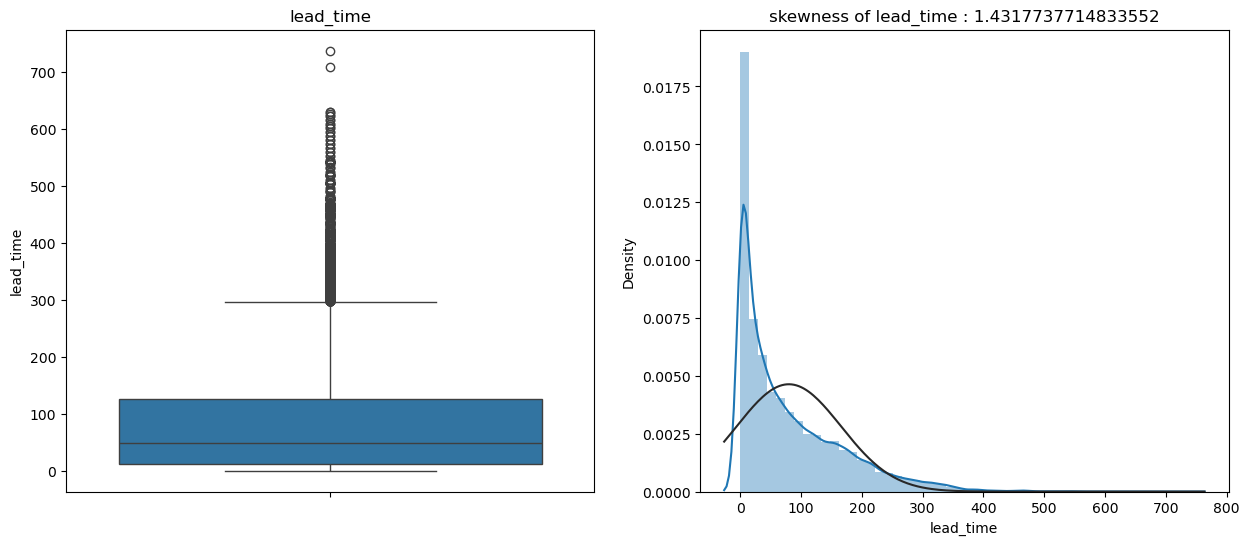

-----------------------------------------------------------------------------


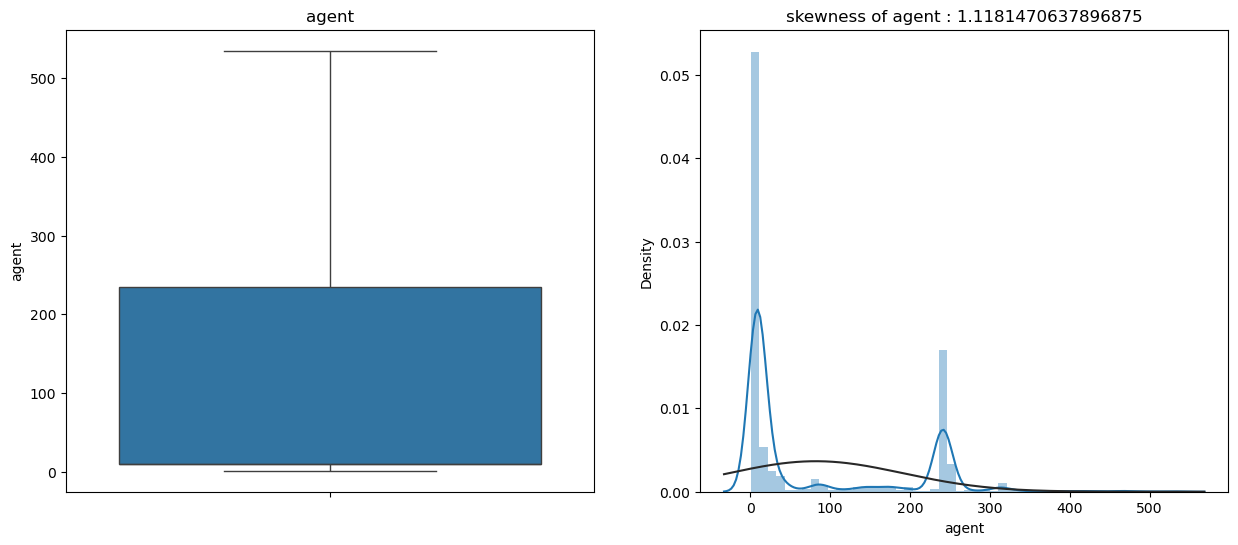

-----------------------------------------------------------------------------


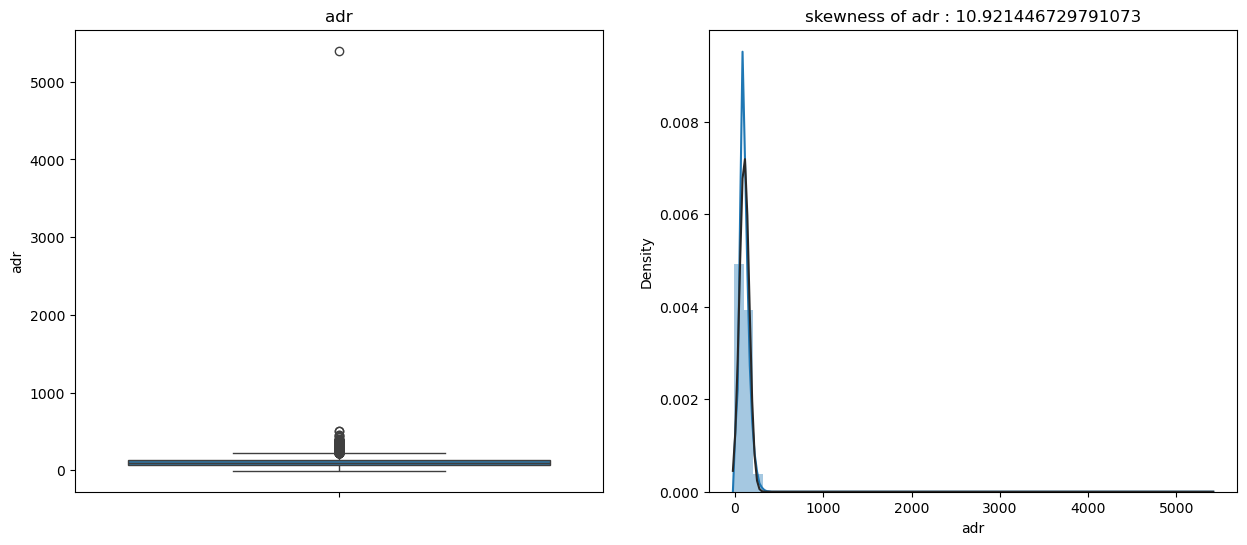

In [47]:
# Checking for outliers for contineous variables

from scipy.stats import norm
for i in contineous_variables:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(i)
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.distplot(df[i], fit=norm)
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('-----------------------------------------------------------------------------')
  plt.show()

#### Outliers were found in the variables lead_time and adr, but not in the variable agent.

In [49]:
# Using Inter Quartile range in skew symmetric curve for removing outliers

# Outlier columns
outliers_columns=['lead_time','adr']

# Copy dataset as new dataset
new_df=df.copy()

# Capping dataset
for i in outliers_columns:
    #Findng IQR
    Q1=new_df[i].quantile(0.25)
    Q3=new_df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining lower and upper limit
    lower_limit =new_df[i].quantile(0.25)-1.5*IQR
    upper_limit =new_df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    new_df.loc[(new_df[i] > upper_limit),i] = upper_limit
    new_df.loc[(new_df[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


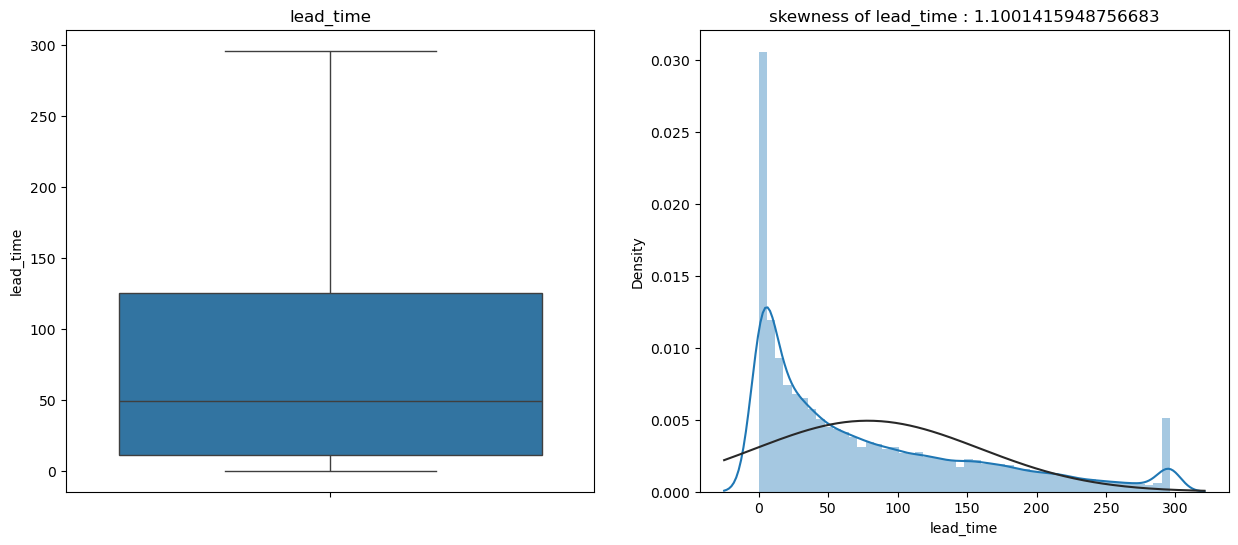

____________________________________________________________________________________________________


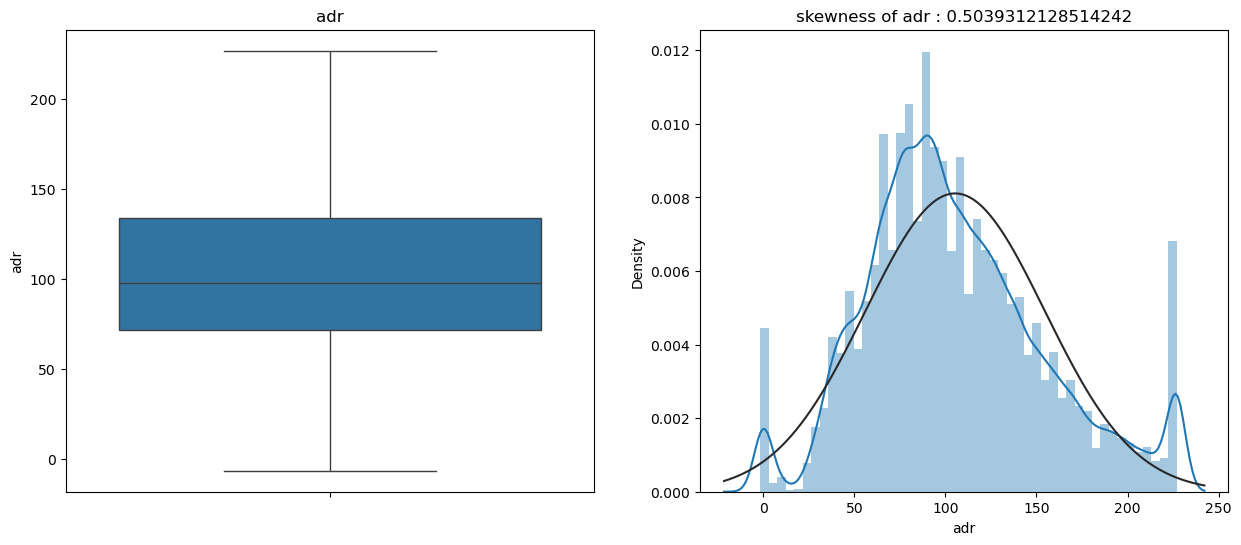

In [50]:
# Checking for outliers for contineous variables
from scipy.stats import norm
for i in outliers_columns:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=new_df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.distplot(new_df[i], fit=norm)
  ax.set_title(f'skewness of {i} : {new_df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*50)
  plt.show()

#### Ouliers in the lead_time and adr variables were removed. 

In [52]:
# Describe outlier free new_df 
new_df.describe()

is_canceled     lead_time  arrival_date_year  \
count  87396.000000  87396.000000       87396.000000   
mean       0.274898     78.363987        2016.210296   
std        0.446466     81.047312           0.686102   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    296.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87396.000000               87396.000000   
mean                  26.838334                  15.815541   
std                   13.674572                   8.835146   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87396.000000          87396.000000  87396.000000   
mean                  1.005263              2.625395      1.875795   
std                   1.031921              2.053584      0.626500   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87396.000000  87396.000000       87396.000000            87396.000000   
mean       0.138633      0.010824           0.039075                0.030413   
std        0.455871      0.113597           0.193775                0.369145   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                    87396.000000     87396.000000  87396.000000   
mean                         0.183990         0.271603     82.260287   
std                          1.731894         0.727245    109.061182   
min                          0.000000         0.000000      1.000000   
25%                          0.000000         0.000000      9.000000   
50%                          0.000000         0.000000      9.000000   
75%                          0.000000         0.000000    234.000000   
max                         72.000000        21.000000    535.000000   

       days_in_waiting_list           adr  required_car_parking_spaces  \
count          87396.000000  87396.000000                 87396.000000   
mean               0.749565    105.344502                     0.084226   
std               10.015731     49.190333                     0.281533   
min                0.000000     -6.380000                     0.000000   
25%                0.000000     72.000000                     0.000000   
50%                0.000000     98.100000                     0.000000   
75%                0.000000    134.000000                     0.000000   
max              391.000000    227.000000                     8.000000   

       total_of_special_requests  
count               87396.000000  
mean                    0.698567  
std                     0.831946  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.00000

### <u> **Data Wrangling and Feature Engineering** <u>

In [54]:
# DataSet
new_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        296               2015   
1       Resort Hotel            0        296               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
0                          0       2  ...                3    No Deposit   
1                          0       2  ...                4    No Deposit   
2                          1       1  ...                0    No Deposit   
3                          1       1  ...                0    No Deposit   
4                          2       2  ...                0    No Deposit   
...                      ...     ...  ...              ...           ...   
119385                     5       2  ...                0    No Deposit   
119386                     5       3  ...                0    No Deposit   
119387                     5       2  ...                0    No Deposit   
119388                     5       2  ...                0    No Deposit   
119389                     7       2  ...                0    No Deposit   

        agent days_in_waiting_list customer_type     adr  \
0         9.0                    0     Transient    0.00   
1         9.0                    0     Transient    0.00   
2         9.0                    0     Transient   75.00   
3       304.0                    0     Transient   75.00   
4       240.0                    0     Transient   98.00   
...       ...                  ...           ...     ...   
119385  394.0                    0     Transient   96.14   
119386    9.0                    0     Transient  225.43   
119387    9.0                    0     Transient  157.71   
119388   89.0                    0     Transient  104.40   
119389    9.0                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0   

In [55]:
#checking unique values in each variable
for i in new_df.columns:
    print(str(i) + ':' + str(new_df[i].unique()))
    print("-----------------------------------------------------------------------")

hotel:['Resort Hotel' 'City Hotel']
-----------------------------------------------------------------------
is_canceled:[0 1]
-----------------------------------------------------------------------
lead_time:[296   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78  48
  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81  79  21 109
 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100  44  80  97
  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65  67  55  88
  54 292  83 105 280  24 103 249  22  91  11 108 106  31  87  41 117  59
  53  58 116  42  38  56  49   6  57  19  25 123  46  89  61 130  74 119
  20 286 136 129 124 131 140 114 139 122 137 126 120 128 135 150 143 151
 132 125 157 147 138 156 164 159 160 161 149 154 163 155 142 144 248 175
 146 170 166 167 148 165 172 171 145 121 178 173 152 158 185 183 177 200
 192 207 174 134 283 153 197 133 241 193 235 194 261 260 216 1

In [56]:
# Checking info of newly formed dataset after removed outliers
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [57]:
# Change datatype of variables children and agent to correct format from float64 to int64
new_df[['children','agent']]=new_df[['children','agent']].astype('int64')

# Change datatype of variable reservation_status_date to correct format from object to datetime64
new_df['reservation_status_date']=pd.to_datetime(new_df['reservation_status_date'], format='%Y-%m-%d')

In [58]:
# Checking datatype
new_df[['children','agent','reservation_status_date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   children                 87396 non-null  int64         
 1   agent                    87396 non-null  int64         
 2   reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB


#### Variables children and agent are in float64 format, so converted them to the appropriate datatype, int64. The reservation_status_date variable is in object format, so converted it to datetime64 format.

In [60]:
# Adding night stays on week night and weekend night in one variable to 'total_stays'
new_df['total_stays']=new_df['stays_in_weekend_nights']+ new_df['stays_in_week_nights']

# Converting "adults," "children," and "babies" to total_people by adding it
new_df['total_people']= new_df['adults']+ df['children']+ new_df['babies']

# Creating 'total_childrens' variable by adding 'chldrens' and 'babies' variables
new_df['total_childrens']= df['children']+ new_df['babies']

# Creating 'reserved_room_assigned' variable which describe same room assigned or not 
new_df['reserved_room_assigned']=np.where(new_df['reserved_room_type']==new_df['assigned_room_type'], 'yes', 'no')

# Creating 'guest_category' from variable 'total_people'
new_df['guest_category']=np.where(new_df['total_people']==1, 'single',
                                 np.where(new_df['total_people']==2, 'couple', 'family'))

# Creating 'lead_time_category' from 'lead_time' variale to display category
new_df['lead_time_category']=np.where(new_df['lead_time']<=15, 'low',
                                 np.where((new_df['lead_time']>15) & (new_df['lead_time']<90), 'medium', 'high'))

#checking dataset
new_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        296               2015               July   
1  Resort Hotel            0        296               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                          0          Check-Out   
1                            0                          0          Check-Out   
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   

  reservation_status_date total_stays total_people  total_childrens  \
0              2015-07-01           0          2.0              0.0   
1              2015-07-01           0          2.0              0.0   
2              2015-07-02           1          1.0              0.0   
3              2015-07-02           1          1.0              0.0   
4              2015-07-03           2          2.0              0.0   

   reserved_room_assigned  guest_category lead_time_category  
0                     yes          couple               high  
1                     yes          couple               high  
2                      no          single                low  
3                     yes          single                low  
4                     yes          couple                low  

[5 rows x 37 columns]

In [61]:
new_df.shape

(87396, 37)

In [62]:
# Remove observations having value 0 in total_people variable
new_df.drop(new_df[new_df['total_people']==0].index, inplace=True)

In [63]:
new_df.shape

(87230, 37)

#### Because observations of the variable total_people cannot be zero, observations with 0 values are removed, reducing the number of observations to 87230 from 87396. 

In [65]:
# Checking info of new dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

In [66]:
# Coverting datatype of variables total_people and total_childrens to int64 from float64
new_df['total_people']=new_df['total_people'].astype('int64')
new_df['total_childrens']=new_df['total_childrens'].astype('int64')

#Checking datatype of total_column
new_df[['total_people','total_childrens']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total_people     87230 non-null  int64
 1   total_childrens  87230 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


## <ins> **2 .Exploratory Data Analysis** <ins>

In [68]:
new_df.head()  # New DataFrame

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        296               2015               July   
1  Resort Hotel            0        296               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
0                            0                          0          Check-Out   
1                            0                          0          Check-Out   
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   

  reservation_status_date total_stays total_people  total_childrens  \
0              2015-07-01           0            2                0   
1              2015-07-01           0            2                0   
2              2015-07-02           1            1                0   
3              2015-07-02           1            1                0   
4              2015-07-03           2            2                0   

   reserved_room_assigned  guest_category lead_time_category  
0                     yes          couple               high  
1                     yes          couple               high  
2                      no          single                low  
3                     yes          single                low  
4                     yes          couple                low  

[5 rows x 37 columns]

### **Univariate Analysis**

In [70]:
# obtaing target variable
excluded_variables = []
target_variables =[]
for i in new_df.columns:
    if len(new_df[i].value_counts()) > 15:
        excluded_variables.append(i)
    else:
        target_variables.append(i)
r =(len(target_variables)+2) //3                

In [71]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

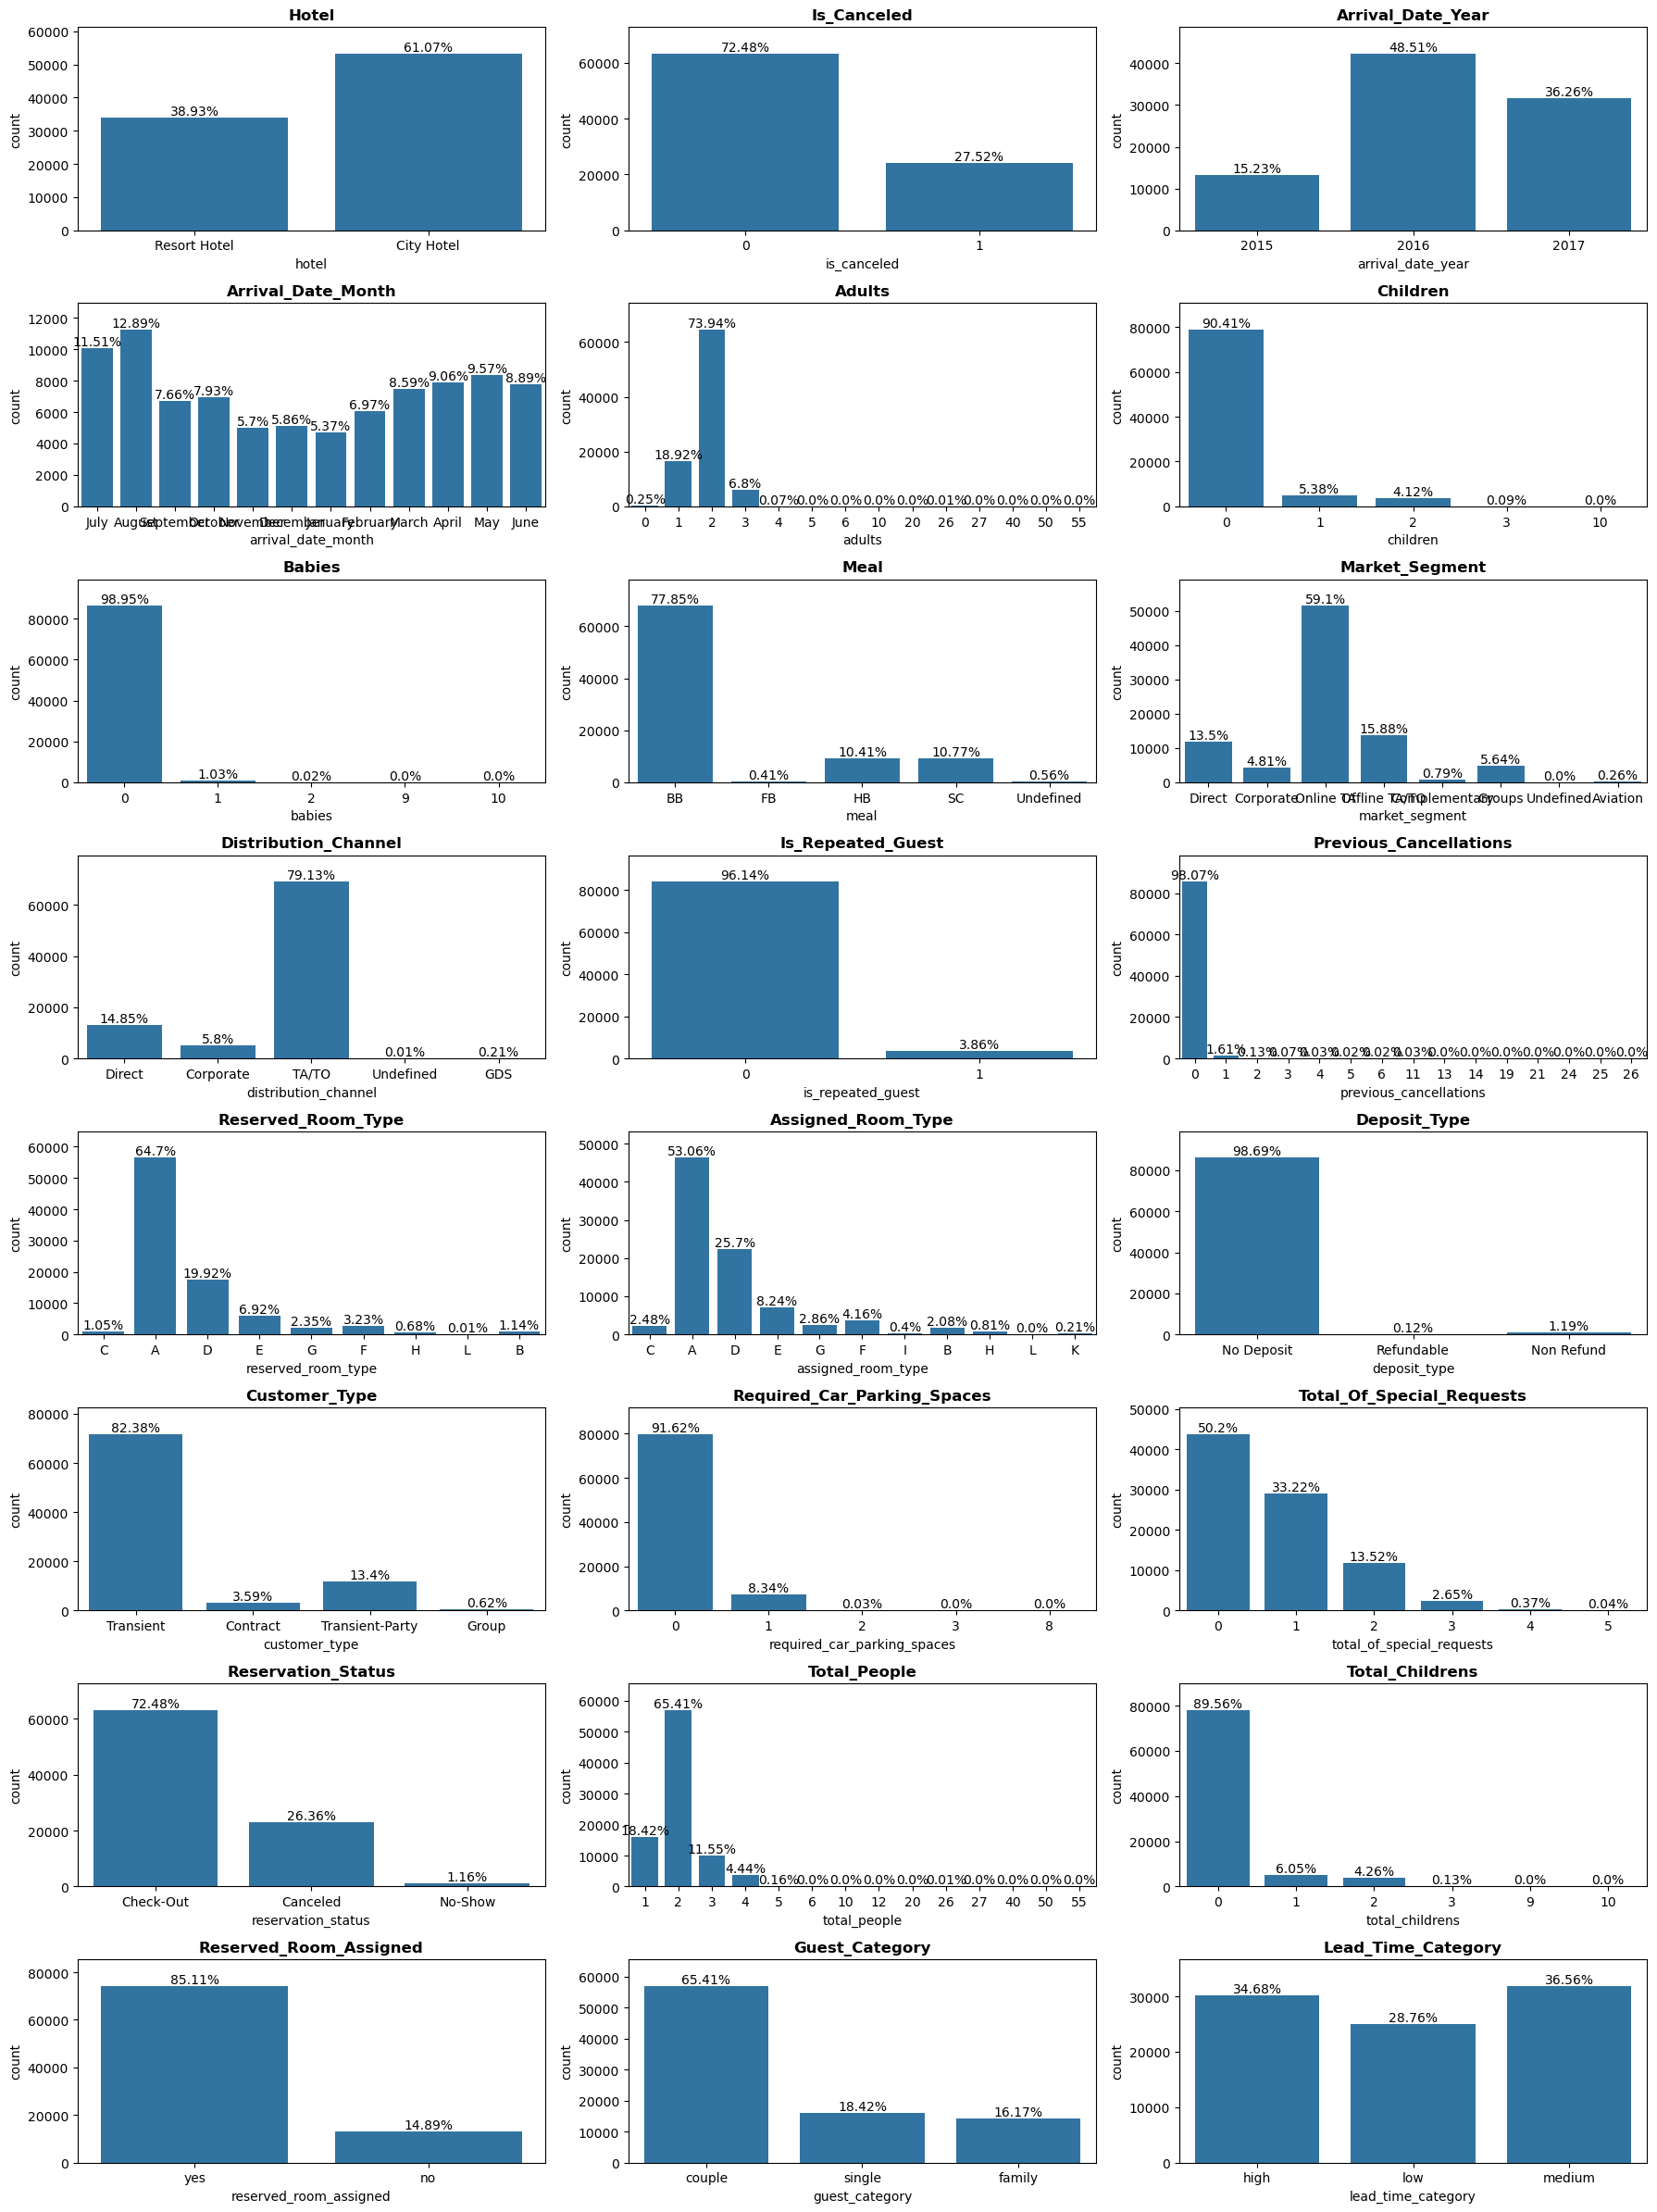

In [72]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=new_df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)
plt.show()    

#### **Bivariate Analysis**

### Is not having a reserved room assigned a reason for booking cancellations?

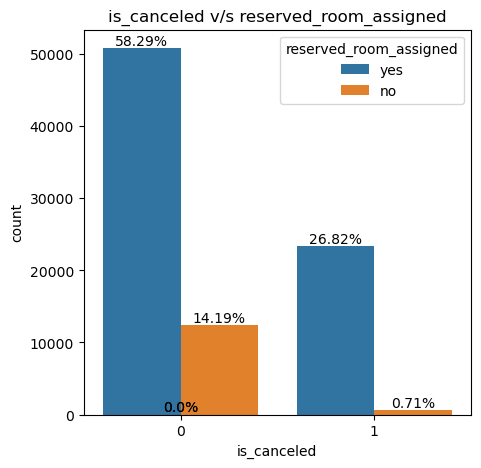

In [75]:
# Plotting count plot for is_canceled in terms of reserved_room_assigned
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['is_canceled'], hue=new_df['reserved_room_assigned'])
ax.set_title('is_canceled v/s reserved_room_assigned')
annot_percent(plot)
plt.show()

#### The inability to assign a reserved room to a customer is not grounds for cancellation. Less than 1% of people who cancelled their booking when the reserved room was not assigned.

### ***2.Is the high lead_time a reason for booking cancellations?***

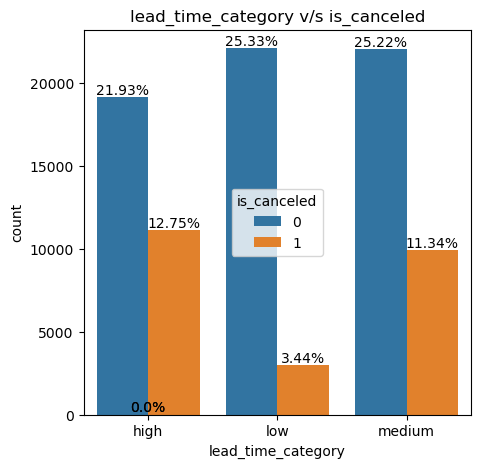

In [78]:
# Plotting count plot for lead_time_category in terms of is_canceled
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['lead_time_category'], hue=new_df['is_canceled'])
ax.set_title('lead_time_category v/s is_canceled')
annot_percent(plot)
plt.show()

### Less lead time means fewer cancellations. Customers who book hotels more than 15 days in advance are more likely to cancel their booking. Booking cancellations are not caused by a longer Lead time.

#### ***How many people are reservations made for?***

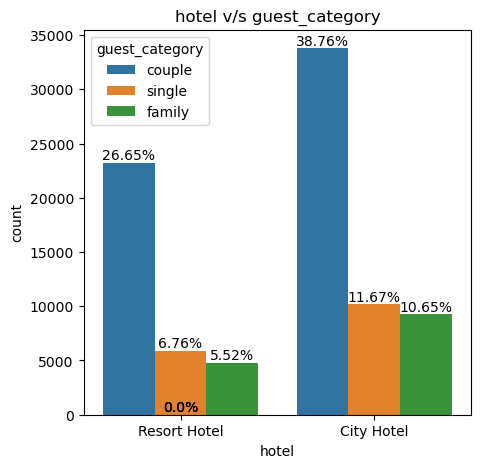

In [81]:
# Plotting count plot for hotel
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['hotel'], hue=new_df['guest_category'])
ax.set_title('hotel v/s guest_category')
annot_percent(plot)
plt.show()

#### Most customers book hotels for two people (couples). Customers prefer city hotels over resorts for family bookings. A city hotel is preferred when booking for a single person.

#### Which hotel type has the most advanced reservations?***

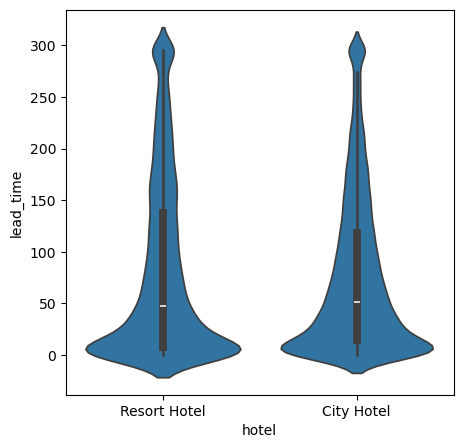

In [84]:
# Plotting violin plot for hotel against lead_time
plt.figure(figsize=(5,5))
sns.violinplot(x=new_df['hotel'], y=new_df['lead_time'])
ax.set_title('is_canceled v/s lead_time')
plt.show()

#### In comparison to city hotels, guests book resort hotels a little bit in advance.

### ***Which distribution channels have the most cancellations of  bookings?***

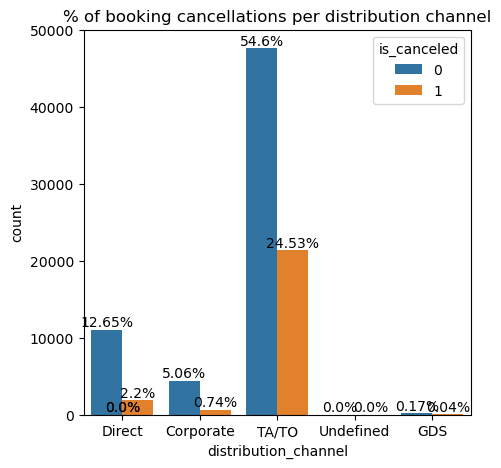

In [87]:
# Plotting a count plot for distribution channels in terms of the number of booking cancellations
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['distribution_channel'], hue=new_df['is_canceled'])
ax.set_title('% of booking cancellations per distribution channel')
annot_percent(plot)
plt.show()

#### The majority of canceled bookings were made through the TA/TO distribution channel. Bookings made through the Direct, Corporate, and GDS distribution channels are extremely unlikely to be canceled.

### ***Which market segment is most used for booking hotels, and which market segment bookings are most canceled?***

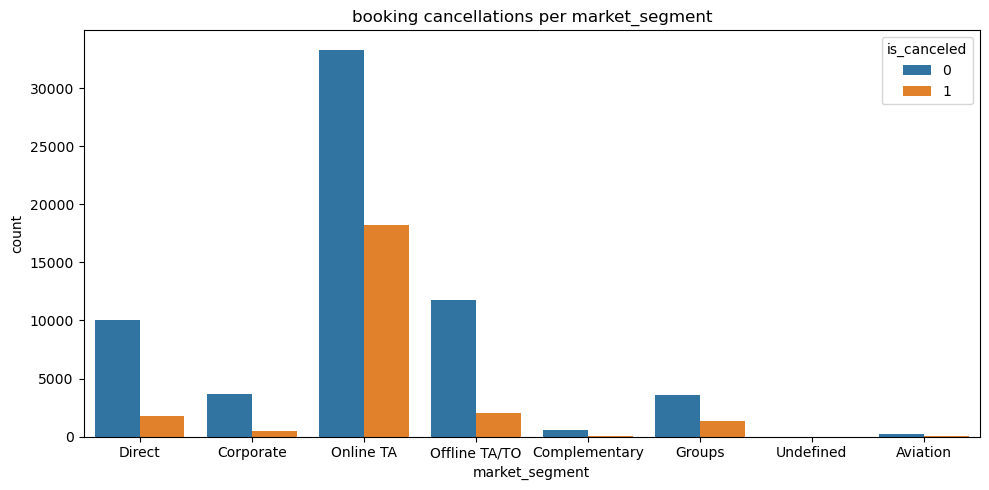

In [90]:
# Plotting count plot for market segment
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['market_segment'], hue=new_df['is_canceled'])
ax.set_title('booking cancellations per market_segment')
plt.tight_layout()
plt.show()

#### The majority of hotel reservations are made online, as are the majority of cancellations of reservations made by customers who made their reservations online. 

### ***Which room generates a higher ADR?***

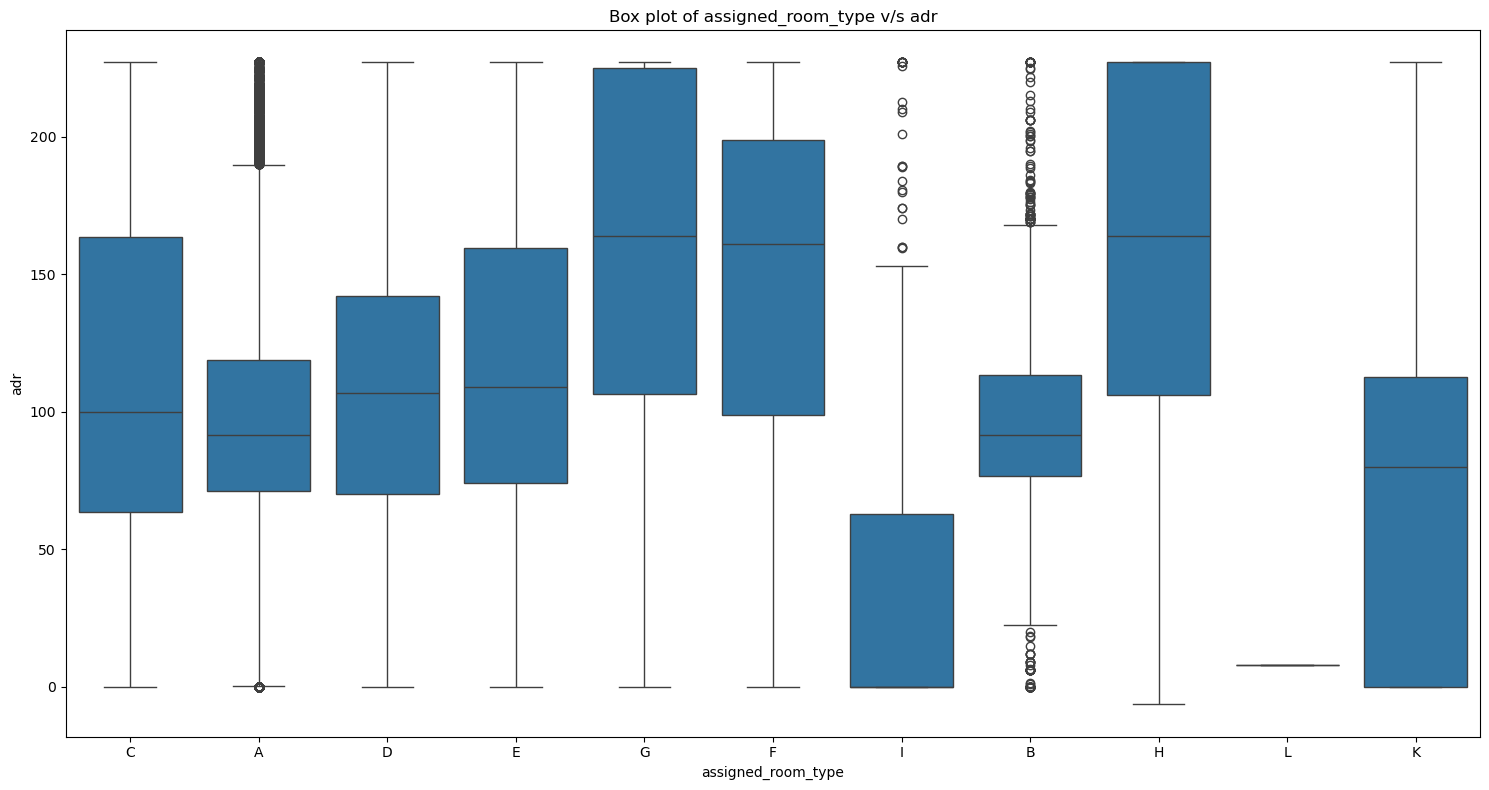

In [93]:
# Plotting box plot assigned_room_type against ADR
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=new_df['assigned_room_type'], y=new_df['adr'])
ax.set_title('Box plot of assigned_room_type v/s adr')
plt.tight_layout()
plt.show()

#### Room types G, followed by H, generate high ADR. Room I has a very low ADR. The most popular room is A, but it has a lower ADR than other room types that are less popular with customers for bookings. To maximize revenue, the hotel should increase the number of rooms in A, G and H.

### ***Which hotel type is the busiest?***

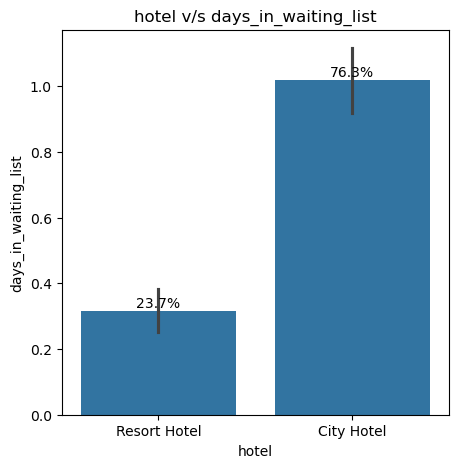

In [96]:
# Plotting bar plot for hotel against number of waiting days for bookings
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.barplot(x=new_df['hotel'], y=new_df['days_in_waiting_list'])
ax.set_title('hotel v/s days_in_waiting_list')
annot_percent(plot)
plt.show()

#### A city hotel is busier than a resort.

### ***Which month is the busiest for hotels?***

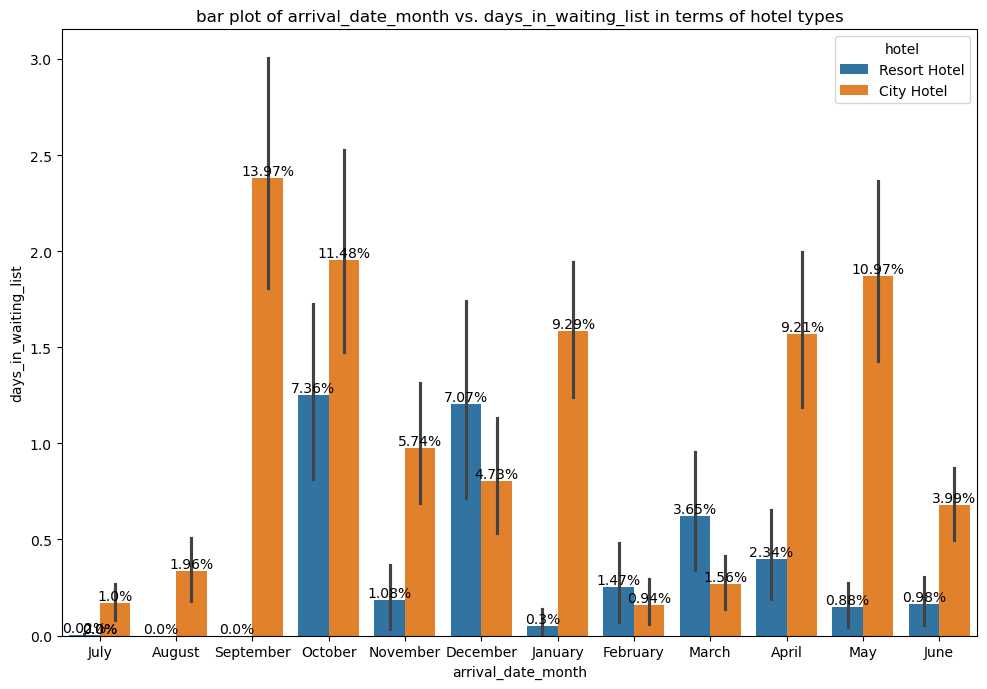

In [99]:
# Bar plot for arrival month of customer against waiting days for bookings
plt.figure(figsize=(10,7))
plot=plt.subplot(111)
ax=sns.barplot(x=new_df['arrival_date_month'], y=new_df['days_in_waiting_list'], hue=new_df['hotel'])
ax.set_title('bar plot of arrival_date_month vs. days_in_waiting_list in terms of hotel types')
annot_percent(plot)
plt.tight_layout()
plt.show()

#### Customers prefer city hotels over resort hotels for the New Year. The city hotel is busiest in October and September , which means that this month has the most bookings. In the fourth quarter of the year, in December, resorts are busier than city hotels. Resort hotels are significantly less busy in the third quarter of the year than they are throughout the year. In July there is no longer waiting period for bookings. 

### ***Which customer type generates more revenue in terms of hotel types and customer types?***

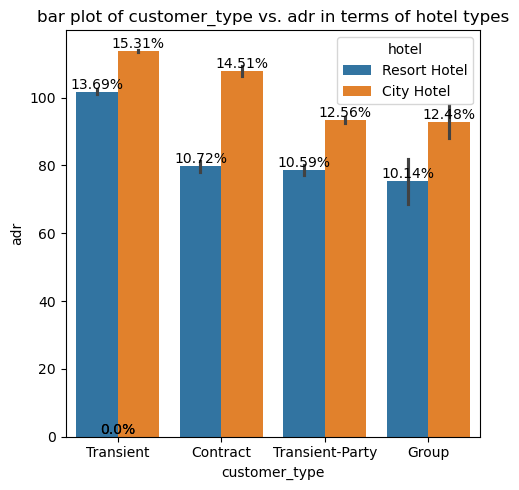

In [102]:
# Plotting bar plot for diffrent customers type against ADR
plt.figure(figsize=(5,5))
plot=plt.subplot(1,1,1)
ax=sns.barplot(x=new_df['customer_type'], y=new_df['adr'], hue=new_df['hotel'])
ax.set_title('bar plot of customer_type vs. adr in terms of hotel types')
annot_percent(plot)
plt.tight_layout()
plt.show()

#### City hotels generate more revenue (54.86%) than resort hotels (45.14%). Transient customers who book rooms for a short period of time generate more revenue than other types of customers.

### ***In terms of hotel types, how many parking spaces are most frequently requested by customers?***

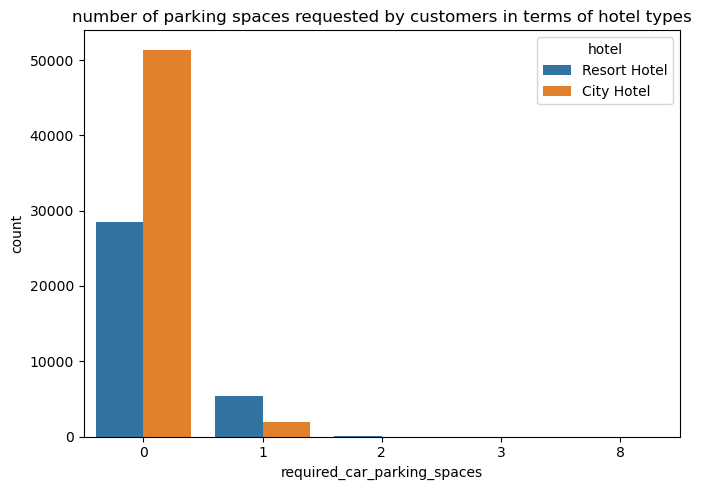

In [105]:
# Plotting count plot for number of requested parking spaces in terms of hotel
plt.figure(figsize=(7,5))
ax=sns.countplot(x=new_df['required_car_parking_spaces'], hue=new_df['hotel'])
ax.set_title('number of parking spaces requested by customers in terms of hotel types')
plt.tight_layout()
plt.show()

#### Most of the customers (91.63%) did not request any parking spaces. Only a few customers (8.31%) requested parking. One parking space is most desirable to customers. The hotel can eliminate parking spaces 3 and 8 and concentrate on parking spaces 1 and 2, which will reduce the cost of providing parking spaces.

### ***What is the most common number of nights booked by customers?***

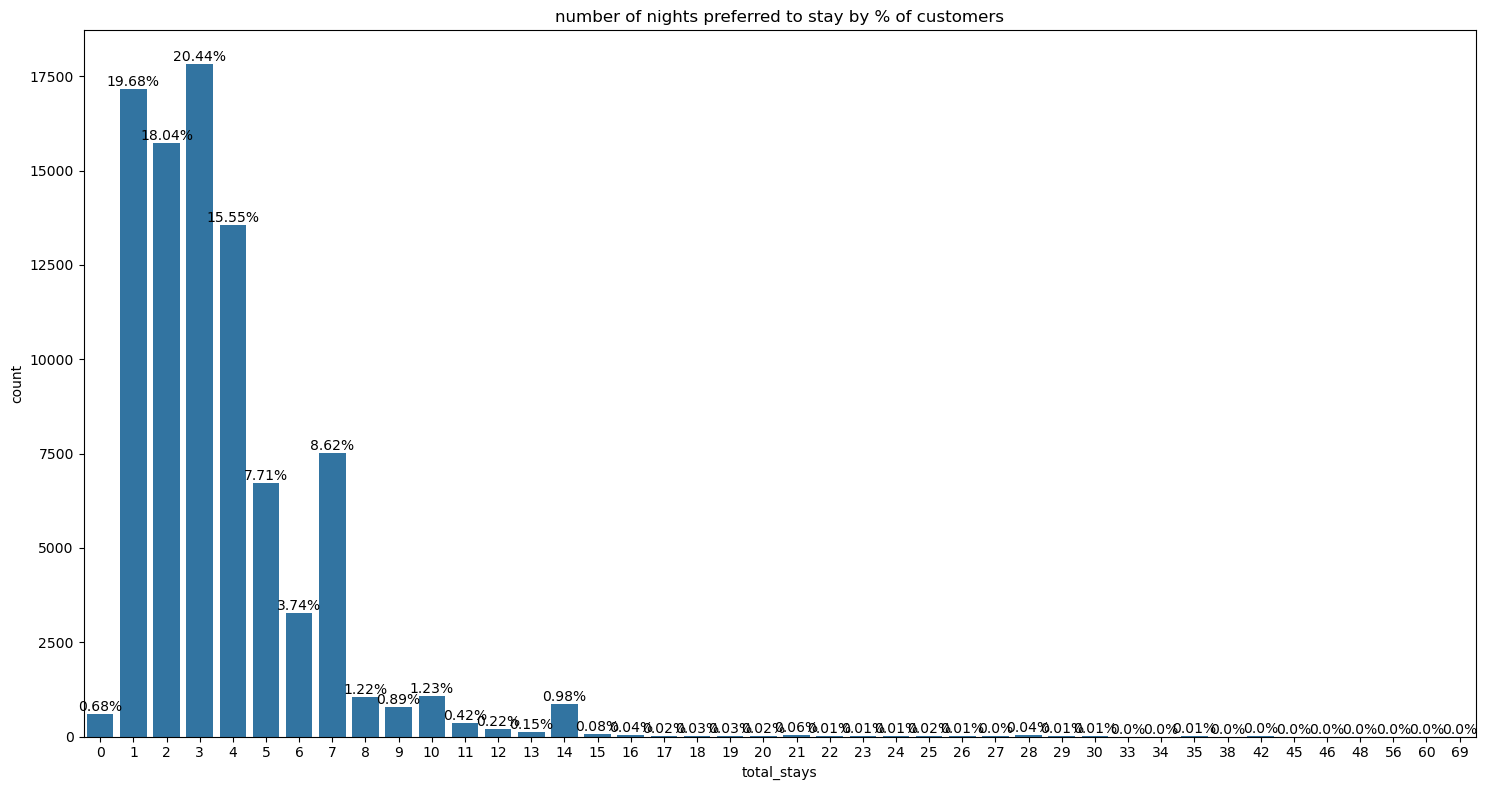

In [108]:
# Plotting count plot for total_stays
plt.figure(figsize=(15,8))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['total_stays'])
ax.set_title('number of nights preferred to stay by % of customers')
annot_percent(plot)
plt.tight_layout()
plt.show()

#### The majority of the guests are staying at the hotel for three nights. Customers who book hotels for more than one week are very rare. Most hotel bookings are for less than 7 nights. The hotel should pay more attention to keeping reservations available for less than 7 nights to not lose customers and to generate more revenue.

### ***What is the most common number of special requests made by customers, and what kind of customer are they?***

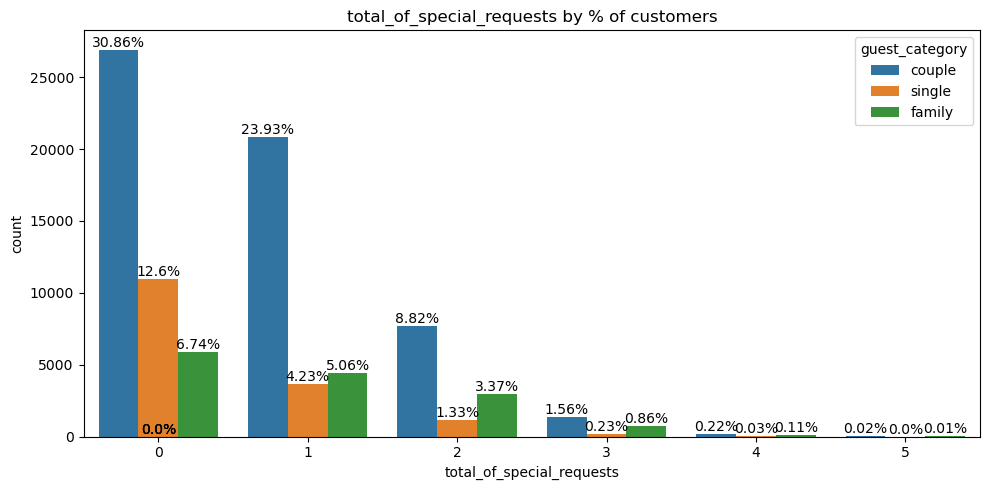

In [111]:
# Plotting count plot for total_of_special_requests in terms of different guest type
plt.figure(figsize=(10,5))
plot=plt.subplot(111)
ax=sns.countplot(x=new_df['total_of_special_requests'], hue=new_df['guest_category'])
ax.set_title('total_of_special_requests by % of customers')
annot_percent(plot)
plt.tight_layout()
plt.show()

#### Approximately half of all customers do not make special requests. Customers frequently make one special request. Couples make the majority of special requests. Bookings made for single people are not more requested for special requests than those made for couples, followed by family and business events.

### ***Is the ADR affected by the hotel not giving a reserved room?***

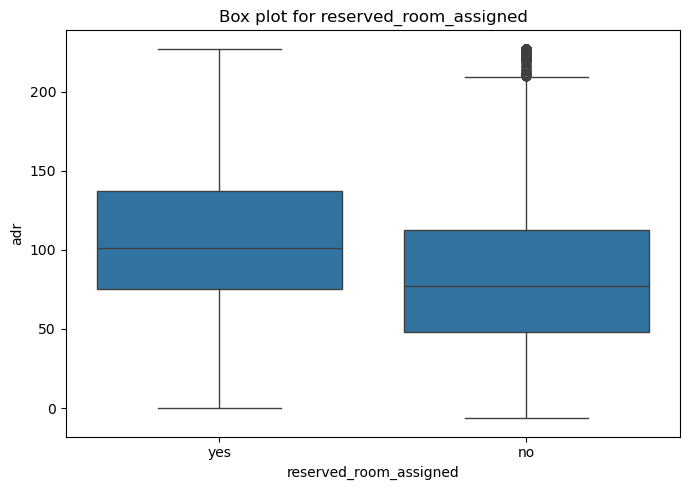

In [114]:
# Plotting box plot for reserved_room_assigned 
plt.figure(figsize=(7,5))
plot=plt.subplot(111)
ax=sns.boxplot(x=new_df['reserved_room_assigned'], y=new_df['adr'])
ax.set_title('Box plot for reserved_room_assigned')
plt.tight_layout()
plt.show()

#### There is no significant difference in ADR between reserved rooms assigned  and not reserved rooms assigned. Not assigning a reserved room does not affect ADR.

### ***The majority of bookings were made for how many people, and the majority of cancellations of bookings were made for how many people?***

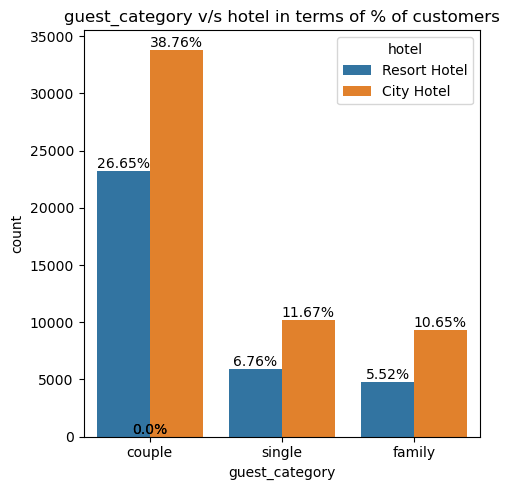

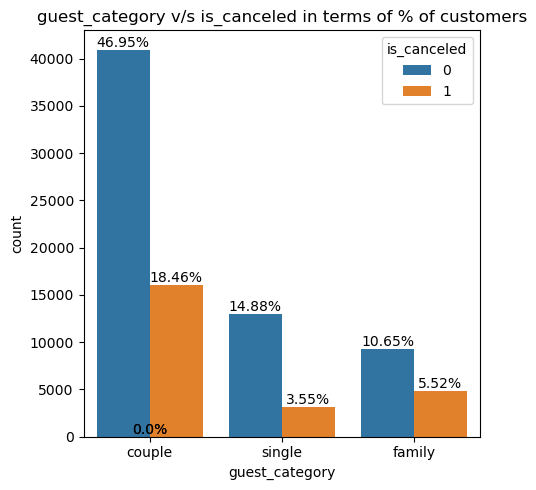

In [117]:
# targeted variable
variables=['hotel','is_canceled']

#ploting graph using for each above variabe
n=0
for var in variables:
    plt.figure(figsize=(5,5))
    plot=plt.subplot(1,1,n+1)
    ax=sns.countplot(x=new_df['guest_category'], hue=new_df[var])
    ax.set_title(f'guest_category v/s {var} in terms of % of customers')
    annot_percent(plot)
    plt.tight_layout()
    plt.show()

#### The majority of hotel reservations are made for couples. Couples' reservations are more likely to be canceled than singles' or families' reservations. Bookings for single people are rarely canceled.

### ***Which country makes the most reservations, and which agent makes the most bookings?***

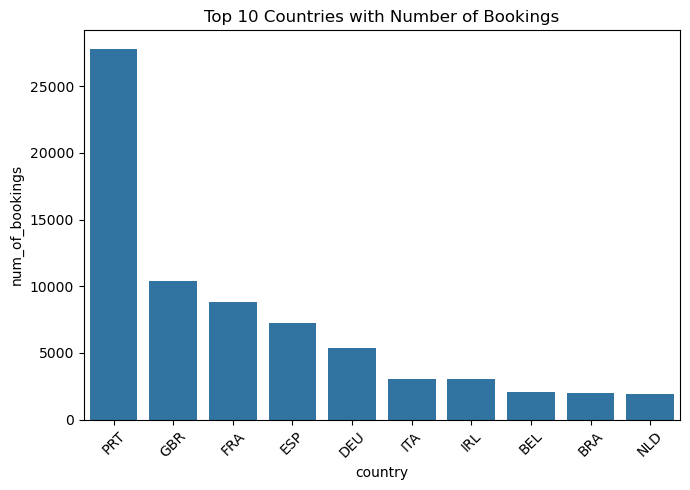

In [120]:
# Creating country_df which counts number of bookings by each country
country_df = new_df['country'].value_counts().reset_index()
country_df.columns = ['country', 'num_of_bookings']

# Plotting barplot for top 10 countries with number of bookings
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=country_df.head(10), x='country', y='num_of_bookings')
ax.set_title('Top 10 Countries with Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


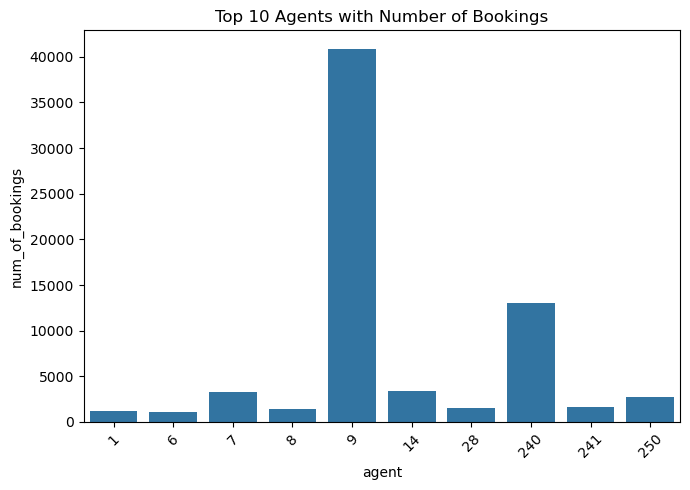

In [121]:
# Creating agent_df which counts number of bookings by each agent
agent_df = new_df['agent'].value_counts().reset_index()
agent_df.columns = ['agent', 'num_of_bookings']

# Plotting barplot for top 10 agents with number of bookings
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=agent_df.head(10), x='agent', y='num_of_bookings')
ax.set_title('Top 10 Agents with Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The majority of reservations are made through country PRT. Customers make the most bookings in the following top 5 countries: PRT, GBR, FRA, ESP, and DEU.
#### Agent nummber 9 made most number of bookings. 9, 240, 7, 14 and 250 are the top 5 agents by number of bookings made.

#### ***Does a longer waiting period cause the cancellation of bookings?***

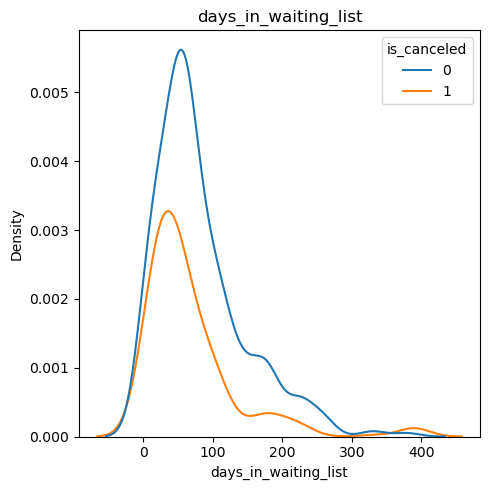

In [124]:
#Selecting bookings with non zero waiting time
waiting_time=new_df[new_df['days_in_waiting_list']!=0]

#ploting graph

plt.figure(figsize=(5,5))
ax=sns.kdeplot(x=waiting_time['days_in_waiting_list'], hue=waiting_time['is_canceled'])
ax.set_title('days_in_waiting_list')
plt.tight_layout()
plt.show()

#### The majority of canceled bookings have a waiting period of less than 150 days, but those that are not canceled bookings by customers have a waiting period of less than 150 days, which has a higher density than the canceled bookings. So a longer waiting period is not a reason for booking cancellation. 

### **Multivariate Analysis**

##### ***1] Correlation Heatmap***

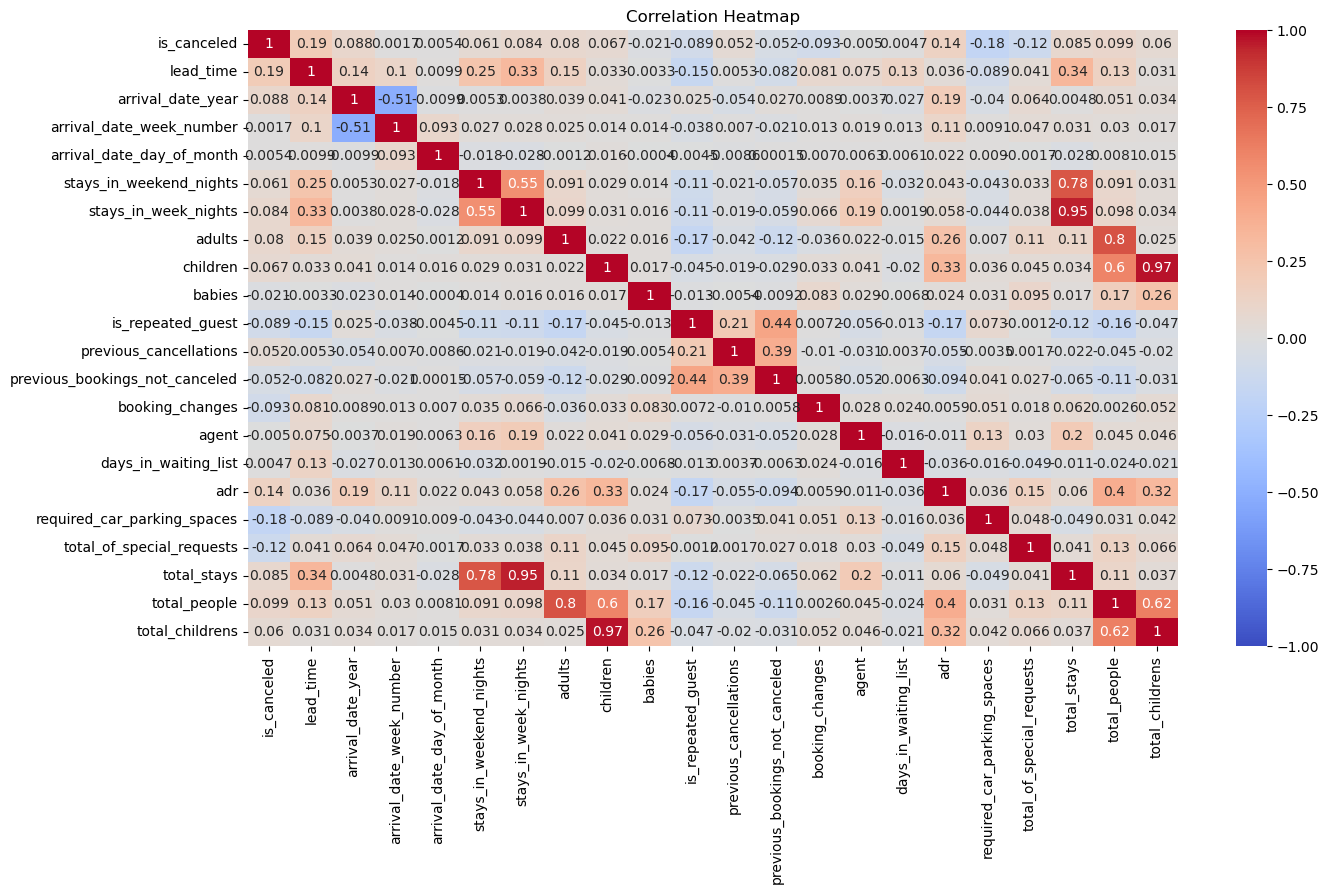

In [128]:
plt.figure(figsize=(15, 8))
sns.heatmap(new_df.select_dtypes(include=['number']).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


#### - In the heatmap, we see some high correlation between a few variables because we created new variables total_stays, total_people, and total_children from existing variables and did not drop old variables.
#### - The variables lead_time and is_canceled have weak relationships. The most likely reason for cancellation is a longer lead time.

### ***2] Pair Plot***

<Figure size 1000x800 with 0 Axes>

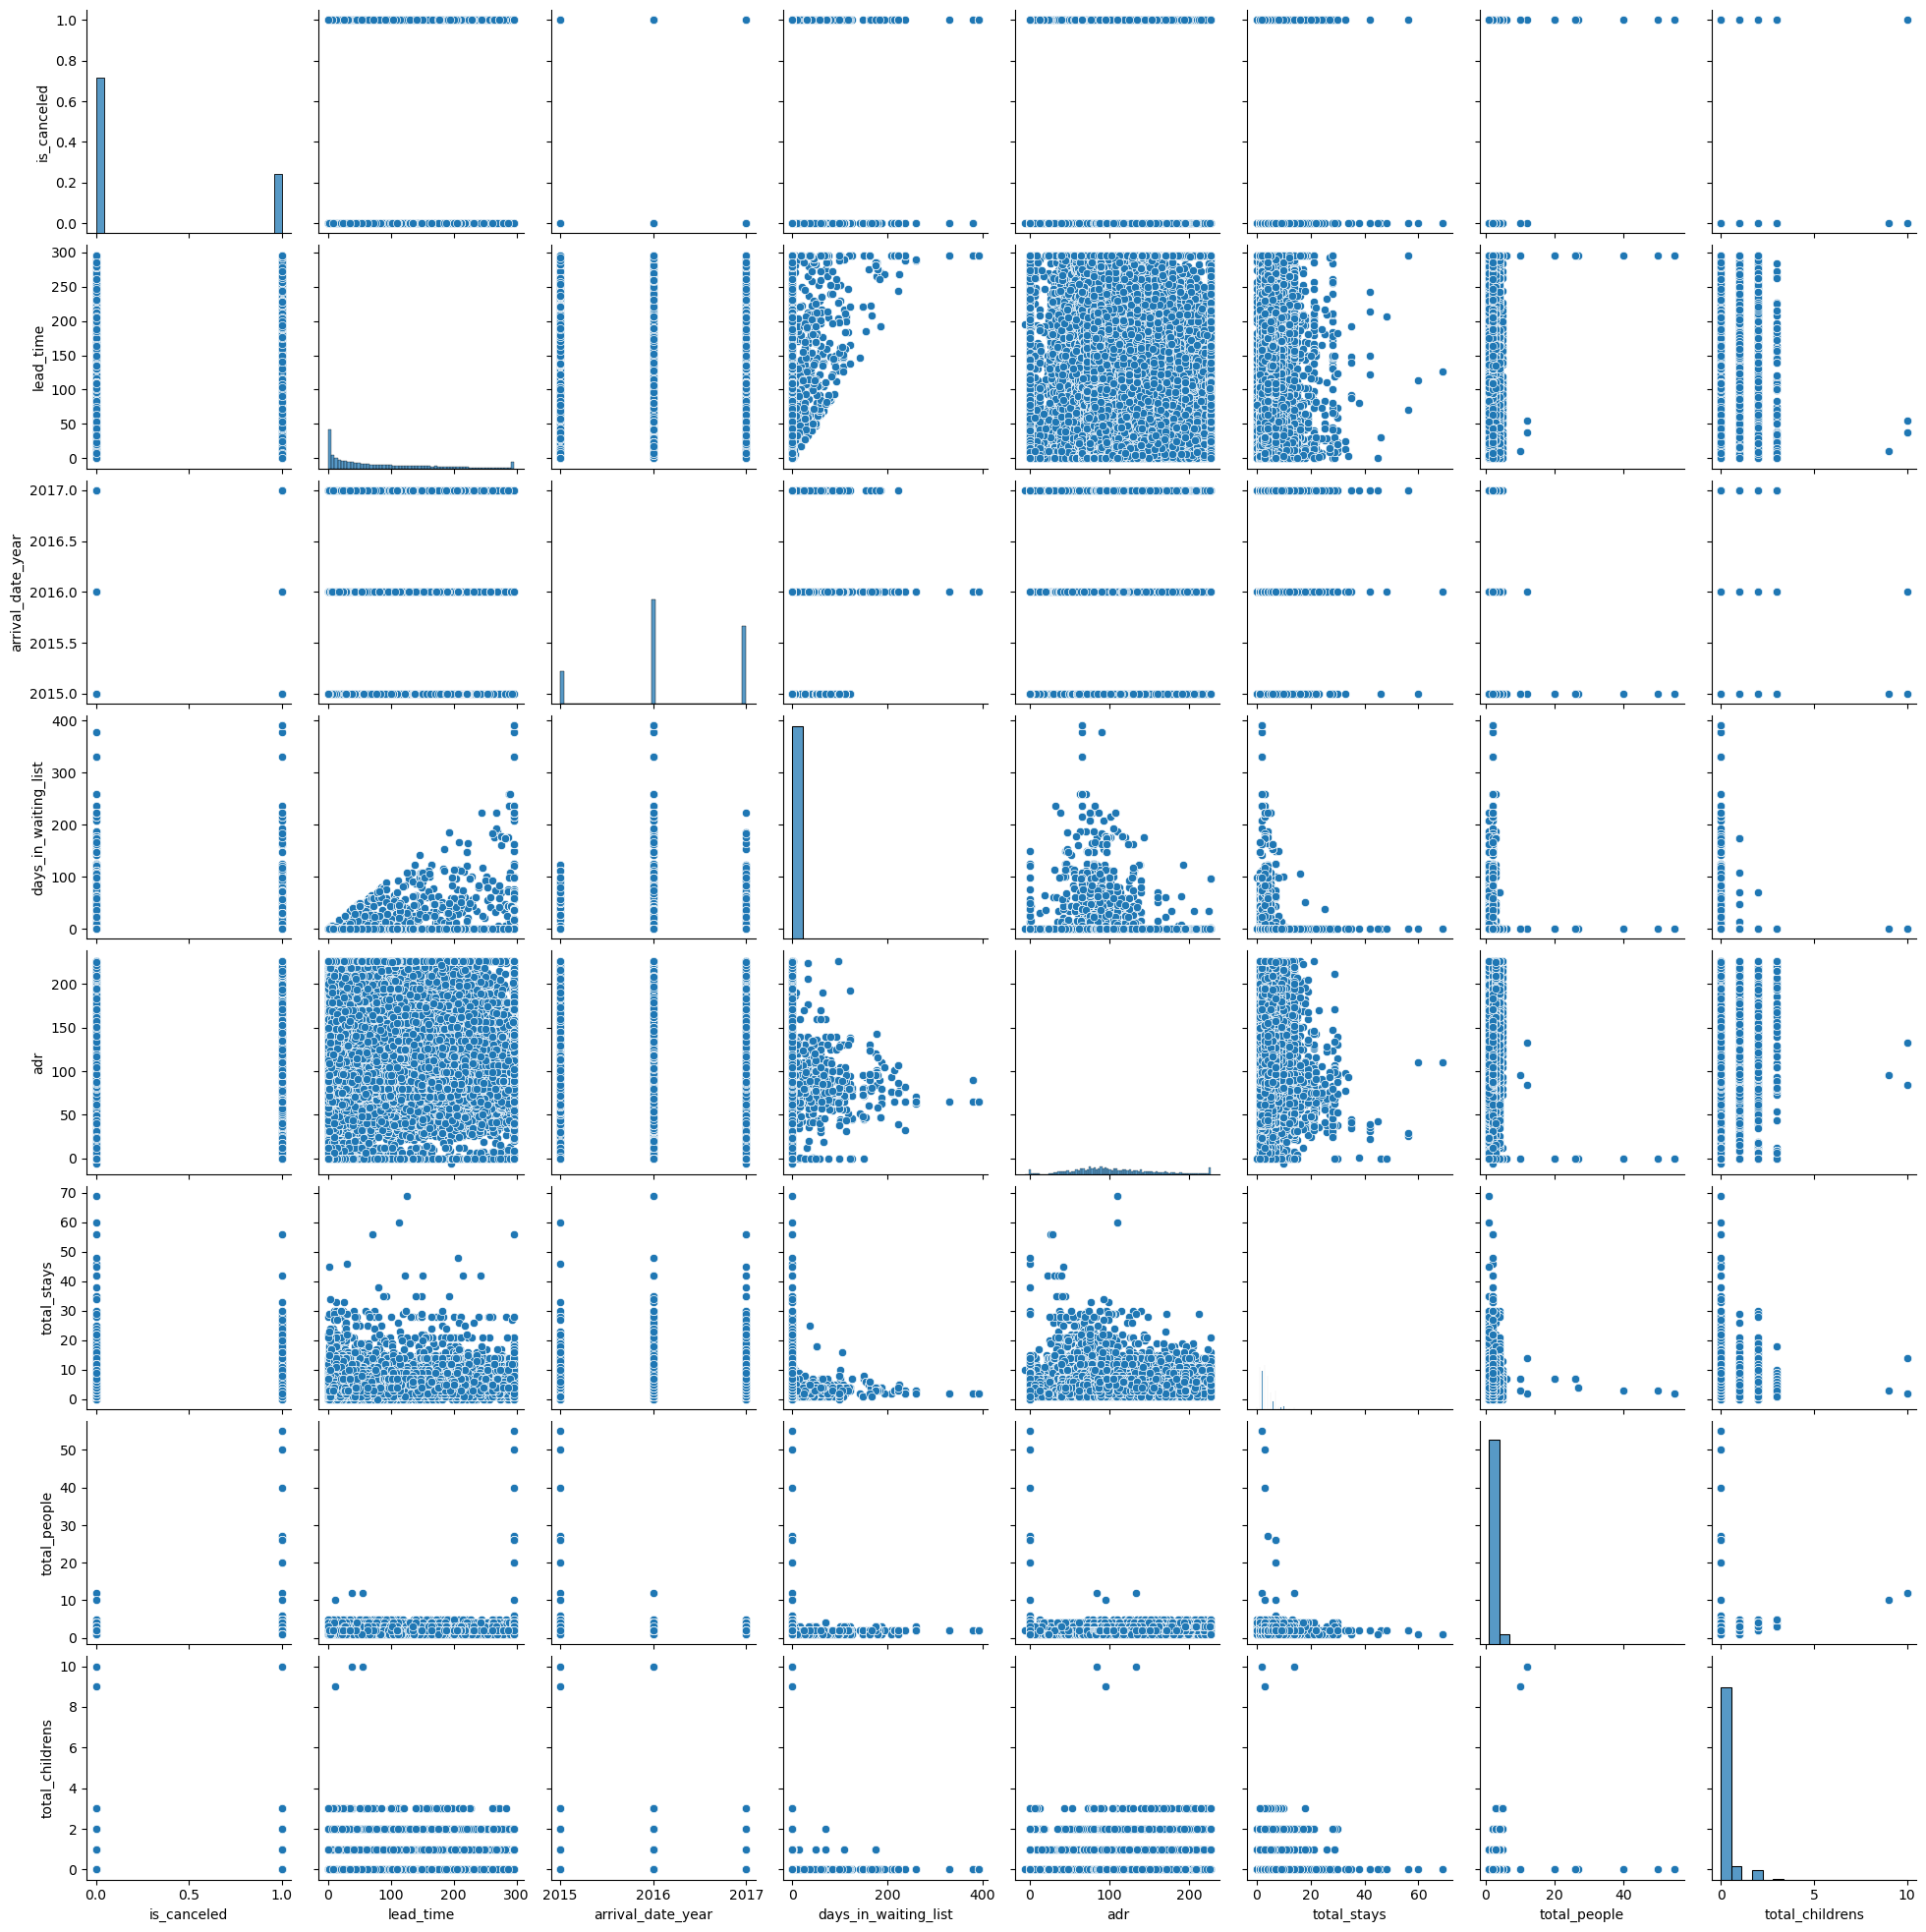

In [131]:
# Creating new dataset
new_df2=new_df[['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type','days_in_waiting_list', 'customer_type', 'adr','total_stays',
       'total_people', 'total_childrens', 'reserved_room_assigned',
       'guest_category', 'lead_time_category']]

# Plotting pair plot for dataset
plt.figure(figsize=(10,8))
ax=sns.pairplot(new_df2)
plt.show()

#### - We can conclude from the relationship between lead_time and is_canceled that a longer lead time does not result in cancellations. 
#### - We can conclude from the lead_time and arrival_date_year graphs that people were consistently interested in booking rooms in advance in 2015, 2016, and 2017. 
#### - According to the graph of arrival_date_year and days_in_waiting_list, 2016 had the longest waiting period for room bookings.
#### - We can conclude from the graph of ADR and days_in_waiting_list that a short minimum waiting period for bookings results in a high ADR. 
#### - From the graph of "is_canceled" and "days_in_waiting_list," we conclude that waiting for bookings is not a reason for booking cancellation.

# **3. Correlation Analysis**

In [134]:
# Select Numeric Features
numeric_df = new_df.select_dtypes(include='number')
numeric_df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        296               2015                        27   
1            0        296               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ...  previous_bookings_not_canceled  \
0       2         0       0  ...                               0   
1       2         0       0  ...                               0   
2       1         0       0  ...                               0   
3       1         0       0  ...                               0   
4       2         0       0  ...                               0   

   booking_changes  agent  days_in_waiting_list   adr  \
0                3      9                     0   0.0   
1                4      9                     0   0.0   
2                0      9                     0  75.0   
3                0    304                     0  75.0   
4                0    240                     0  98.0   

   required_car_parking_spaces  total_of_special_requests  total_stays  \
0                            0                          0            0   
1                            0                          0            0   
2                            0                          0            1   
3                            0                          0            1   
4                            0                          1            2   

   total_people  total_childrens  
0             2                0  
1             2                0  
2             1                0  
3             1                0  
4             2                0  

[5 rows x 22 columns]

In [135]:
# Compute Pearson Correlation Matrix
pearson_corr = numeric_df.corr(method='pearson')
pearson_corr

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.188370           0.088020   
lead_time                          0.188370   1.000000           0.140766   
arrival_date_year                  0.088020   0.140766           1.000000   
arrival_date_week_number           0.001691   0.102236          -0.513895   
arrival_date_day_of_month          0.005449   0.009893          -0.009872   
stays_in_weekend_nights            0.060992   0.249108           0.005277   
stays_in_week_nights               0.084159   0.326353           0.003765   
adults                             0.080271   0.145927           0.038744   
children                           0.067182   0.033051           0.041178   
babies                            -0.020627  -0.003260          -0.023366   
is_repeated_guest                 -0.088764  -0.151504           0.024678   
previous_cancellations             0.051501   0.005343          -0.054284   
previous_bookings_not_canceled    -0.052178  -0.082146           0.027266   
booking_changes                   -0.093236   0.080802           0.008944   
agent                             -0.004952   0.074917          -0.003677   
days_in_waiting_list               0.004710   0.125045          -0.027490   
adr                                0.136551   0.036320           0.186731   
required_car_parking_spaces       -0.184456  -0.088708          -0.040041   
total_of_special_requests         -0.120794   0.040673           0.064210   
total_stays                        0.085431   0.336003           0.004776   
total_people                       0.098987   0.133439           0.050902   
total_childrens                    0.059956   0.031155           0.034167   

                                arrival_date_week_number  \
is_canceled                                     0.001691   
lead_time                                       0.102236   
arrival_date_year                              -0.513895   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.093273   
stays_in_weekend_nights                         0.027466   
stays_in_week_nights                            0.028498   
adults                                          0.025322   
children                                        0.013542   
babies                                          0.014302   
is_repeated_guest                              -0.038221   
previous_cancellations                          0.007038   
previous_bookings_not_canceled                 -0.020938   
booking_changes                                 0.012943   
agent                                           0.019471   
days_in_waiting_list                            0.013159   
adr                                             0.105574   
required_car_parking_spaces                     0.009054   
total_of_special_requests                       0.046759   
total_stays                                     0.031480   
total_people                                    0.029802   
total_childrens                                 0.016531   

                                arrival_date_day_of_month  \
is_canceled                                      0.005449   
lead_time                                        0.009893   
arrival_date_year                               -0.009872   
arrival_date_week_number                         0.093273   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.017636   
stays_in_week_nights                            -0.028375   
adults                                          -0.001235   
children                                         0.015826   
babies                                          -0.000397   
is_repeated_guest                               -0.004538   
previous_cancellations                          -0.008553   
previous_bookings_not_canceled                   0.000148   
booking_changes          

In [136]:
# Compute Spearman Correlation Matrix
spearman_corr = numeric_df.corr(method='spearman')
spearman_corr

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.226187           0.087293   
lead_time                          0.226187   1.000000           0.137471   
arrival_date_year                  0.087293   0.137471           1.000000   
arrival_date_week_number           0.000730   0.097661          -0.515771   
arrival_date_day_of_month          0.005444   0.012239          -0.011080   
stays_in_weekend_nights            0.059884   0.295292           0.010198   
stays_in_week_nights               0.095697   0.417763           0.018271   
adults                             0.089306   0.231047           0.059950   
children                           0.061163   0.051234           0.043672   
babies                            -0.021320  -0.001492          -0.023375   
is_repeated_guest                 -0.088764  -0.215655           0.023547   
previous_cancellations             0.126602  -0.000359          -0.109796   
previous_bookings_not_canceled    -0.103602  -0.198508           0.028397   
booking_changes                   -0.123765   0.057183          -0.005148   
agent                             -0.030822   0.067128           0.004275   
days_in_waiting_list               0.015194   0.098005          -0.027846   
adr                                0.142165   0.105758           0.189733   
required_car_parking_spaces       -0.186316  -0.111798          -0.042426   
total_of_special_requests         -0.127855   0.063304           0.065703   
total_stays                        0.104277   0.458170           0.023504   
total_people                       0.101208   0.216584           0.067522   
total_childrens                    0.053324   0.049614           0.035065   

                                arrival_date_week_number  \
is_canceled                                     0.000730   
lead_time                                       0.097661   
arrival_date_year                              -0.515771   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.087368   
stays_in_weekend_nights                         0.037230   
stays_in_week_nights                            0.041576   
adults                                          0.026720   
children                                        0.016828   
babies                                          0.017538   
is_repeated_guest                              -0.040249   
previous_cancellations                          0.047496   
previous_bookings_not_canceled                 -0.047091   
booking_changes                                 0.017991   
agent                                           0.016692   
days_in_waiting_list                           -0.000826   
adr                                             0.114904   
required_car_parking_spaces                     0.010794   
total_of_special_requests                       0.044316   
total_stays                                     0.046658   
total_people                                    0.033210   
total_childrens                                 0.021278   

                                arrival_date_day_of_month  \
is_canceled                                      0.005444   
lead_time                                        0.012239   
arrival_date_year                               -0.011080   
arrival_date_week_number                         0.087368   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.008699   
stays_in_week_nights                            -0.017154   
adults                                           0.003242   
children                                         0.016792   
babies                                           0.000405   
is_repeated_guest                               -0.004498   
previous_cancellations                          -0.004060   
previous_bookings_not_canceled                  -0.001752   
booking_changes          

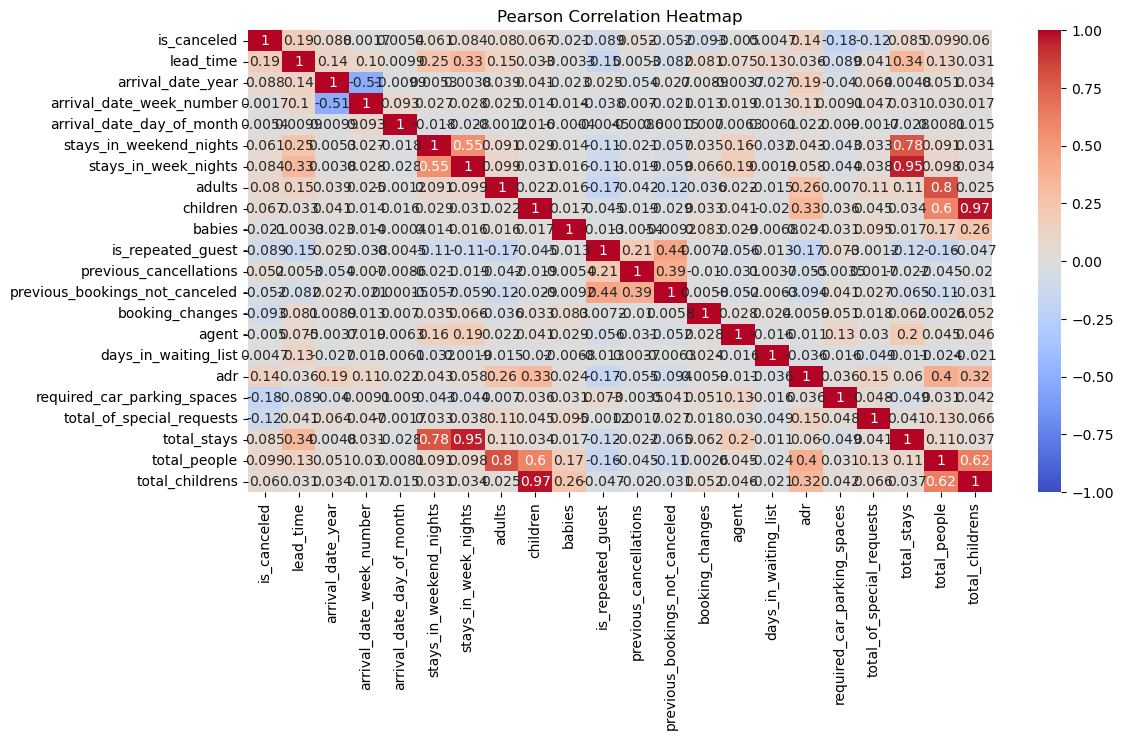

In [137]:
# Visualize with Heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()


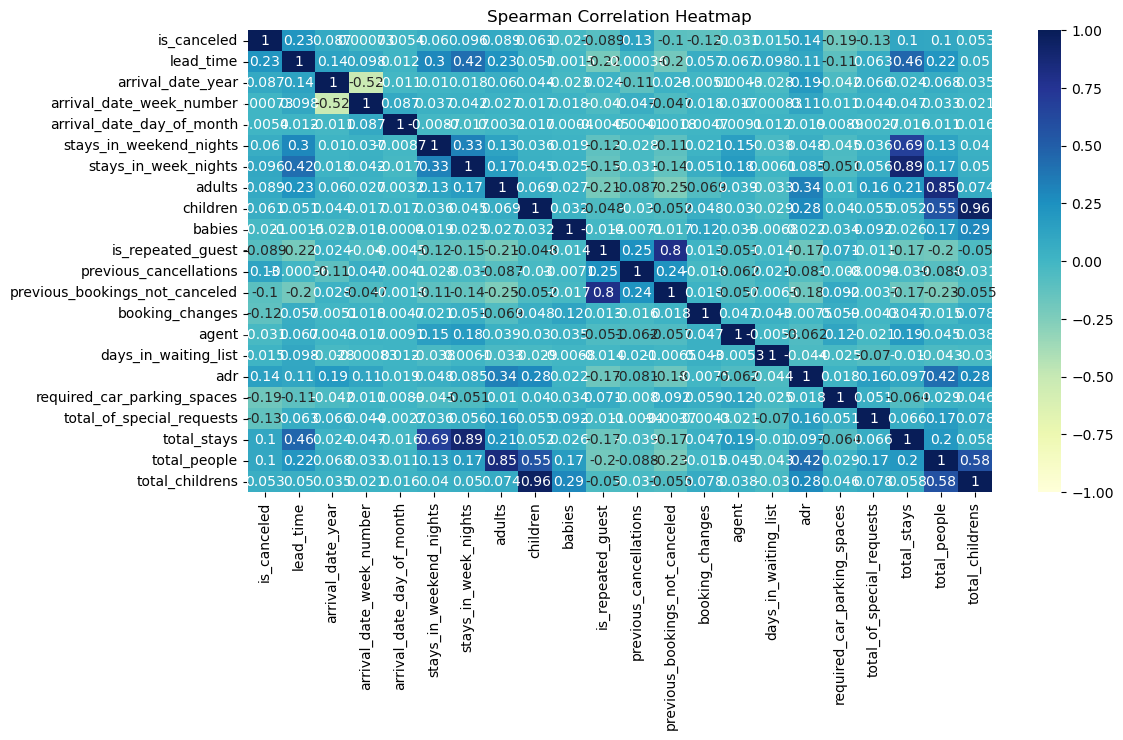

In [138]:
# Spearman Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')
plt.show()


In [139]:
#Focus on adr (Average Daily Rate)
#Pearson correlations with adr:
adr_pearson_corr = pearson_corr['adr'].sort_values(ascending=False)
print("Top Pearson Correlations with ADR:\n", adr_pearson_corr)


Top Pearson Correlations with ADR:
 adr                               1.000000
total_people                      0.398056
children                          0.329168
total_childrens                   0.323945
adults                            0.259884
arrival_date_year                 0.186731
total_of_special_requests         0.150586
is_canceled                       0.136551
arrival_date_week_number          0.105574
total_stays                       0.059599
stays_in_week_nights              0.058412
stays_in_weekend_nights           0.043144
lead_time                         0.036320
required_car_parking_spaces       0.036179
babies                            0.024244
arrival_date_day_of_month         0.022244
booking_changes                   0.005930
agent                            -0.011157
days_in_waiting_list             -0.035546
previous_cancellations           -0.054831
previous_bookings_not_canceled   -0.094471
is_repeated_guest                -0.165370
Name: adr, dtype: 

In [140]:
# Spearman correlations with adr:
adr_spearman_corr = spearman_corr['adr'].sort_values(ascending=False)
print("Top Spearman Correlations with ADR:\n", adr_spearman_corr)


Top Spearman Correlations with ADR:
 adr                               1.000000
total_people                      0.420936
adults                            0.335610
children                          0.283455
total_childrens                   0.276387
arrival_date_year                 0.189733
total_of_special_requests         0.161937
is_canceled                       0.142165
arrival_date_week_number          0.114904
lead_time                         0.105758
total_stays                       0.097065
stays_in_week_nights              0.084768
stays_in_weekend_nights           0.047781
babies                            0.021710
arrival_date_day_of_month         0.018839
required_car_parking_spaces       0.018162
booking_changes                  -0.007539
days_in_waiting_list             -0.044128
agent                            -0.062464
previous_cancellations           -0.081031
is_repeated_guest                -0.172445
previous_bookings_not_canceled   -0.175261
Name: adr, dtype:

In [141]:
#Specifically Explore These Key Features
features = ['lead_time', 'total_of_special_requests', 'booking_changes']

for feat in features:
    print(f"{feat} - Pearson Corr with ADR: {pearson_corr['adr'].get(feat)}")
    print(f"{feat} - Spearman Corr with ADR: {spearman_corr['adr'].get(feat)}\n")


lead_time - Pearson Corr with ADR: 0.03632035523928422
lead_time - Spearman Corr with ADR: 0.10575762548343023

total_of_special_requests - Pearson Corr with ADR: 0.15058604086532976
total_of_special_requests - Spearman Corr with ADR: 0.16193738966788446

booking_changes - Pearson Corr with ADR: 0.005930216965263503
booking_changes - Spearman Corr with ADR: -0.007539009766900259



#### **lead_time** may show a weak or negative correlation (longer wait ≠ higher price).

#### **special_requests** often has a positive correlation with adr (more services = higher cost).

#### **booking_changes** may show mild influence depending on behavior.

# **4.  Hypothesis Testing**

In [144]:
#1. ADR difference between Online TA and Direct bookings
#Hypothesis:
#H₀ (Null): ADR is the same for Online TA and Direct bookings.
#H₁ (Alt): ADR is different between Online TA and Direct bookings.
#Method: Independent t-test for two groups

In [145]:
from scipy.stats import ttest_ind

# Filter ADR values for both groups
adr_online = new_df[new_df['distribution_channel'] == 'TA/TO']['adr']
adr_direct = new_df[new_df['distribution_channel'] == 'Direct']['adr']

# Run t-test
t_stat, p_value = ttest_ind(adr_online.dropna(), adr_direct.dropna(), equal_var=False)

print("T-test for ADR between Online TA and Direct:")
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))

if p_value < 0.05:
    print("Result: Reject H₀ → ADR differs between Online TA and Direct")
else:
    print("Result: Fail to reject H₀ → No significant difference in ADR")


T-test for ADR between Online TA and Direct:
T-statistic: 0.6122
P-value: 0.5404
Result: Fail to reject H₀ → No significant difference in ADR


In [146]:
#3. Do average stay durations differ by customer type?
#Hypothesis:
#H₀ (Null): All customer types have the same mean stay duration.
#H₁ (Alt): At least one customer type differs.
#Method: One-way ANOVA

In [147]:
from scipy.stats import f_oneway

# Create total stay duration
new_df['stay_duration'] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']

# Split by customer type
grouped_durations = [group['stay_duration'].dropna() for name, group in new_df.groupby('customer_type')]

# ANOVA test
f_stat, p_val = f_oneway(*grouped_durations)

print("\nANOVA Test for Stay Duration Across Customer Types:")
print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_val, 4))

if p_val < 0.05:
    print("Result: Reject H₀ → Stay duration differs by customer type")
else:
    print("Result: Fail to reject H₀ → No significant difference in stay durations")



ANOVA Test for Stay Duration Across Customer Types:
F-statistic: 902.8351
P-value: 0.0
Result: Reject H₀ → Stay duration differs by customer type


# **5.Key Business Questions**

In [149]:
# 1.What influences ADR (Average Daily Rate) the most?
new_df.select_dtypes(include='number').corr()['adr'].sort_values(ascending=False)


adr                               1.000000
total_people                      0.398056
children                          0.329168
total_childrens                   0.323945
adults                            0.259884
arrival_date_year                 0.186731
total_of_special_requests         0.150586
is_canceled                       0.136551
arrival_date_week_number          0.105574
total_stays                       0.059599
stay_duration                     0.059599
stays_in_week_nights              0.058412
stays_in_weekend_nights           0.043144
lead_time                         0.036320
required_car_parking_spaces       0.036179
babies                            0.024244
arrival_date_day_of_month         0.022244
booking_changes                   0.005930
agent                            -0.011157
days_in_waiting_list             -0.035546
previous_cancellations           -0.054831
previous_bookings_not_canceled   -0.094471
is_repeated_guest                -0.165370
Name: adr, 

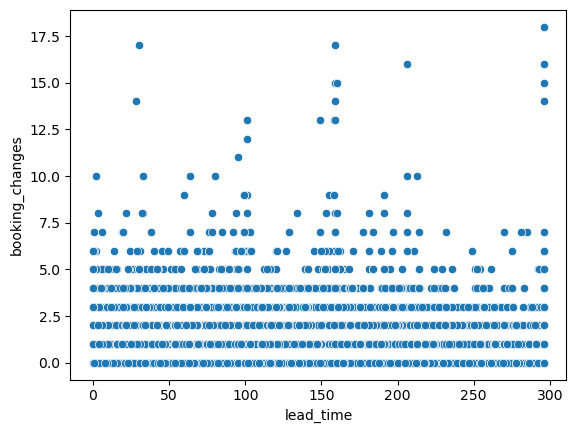

In [150]:
# 2.Do guests who book earlier tend to request more changes?Selection deleted
sns.scatterplot(data=new_df, x='lead_time', y='booking_changes')
plt.show()

In [151]:
#3. Are there pricing or booking differences across countries?
new_df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)


country
AIA    227.000000
DJI    227.000000
UMI    200.000000
AND    182.571429
LAO    181.665000
NCL    175.500000
GIB    166.949333
FRO    165.666667
MYT    163.000000
GEO    151.544737
Name: adr, dtype: float64

In [152]:
# 4. Is there a pattern in room upgrades or reassignment?
new_df['is_upgraded'] = new_df['reserved_room_type'] != new_df['assigned_room_type']
new_df['is_upgraded'].value_counts()


is_upgraded
False    74240
True     12990
Name: count, dtype: int64

In [153]:
#5. Are reserved room types consistently matched with assigned room types?
(new_df['reserved_room_type'] == new_df['assigned_room_type']).value_counts(normalize=True)


True     0.851083
False    0.148917
Name: proportion, dtype: float64

In [154]:
# 6. What are the most common guest demographics (e.g., group size, nationality)?
new_df['total_guests'] = new_df['adults'] + new_df['children'] + new_df['babies']
new_df['total_guests'].value_counts().head()
new_df['country'].value_counts().head()


country
PRT    27802
GBR    10424
FRA     8823
ESP     7244
DEU     5385
Name: count, dtype: int64

In [155]:
#  7. Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?
new_df.groupby('customer_type')[['adr', 'lead_time', 'booking_changes']].mean()


adr   lead_time  booking_changes
customer_type                                           
Contract          92.863327  106.273684         0.150239
Group             84.020148   49.369686         0.277264
Transient        109.173723   72.692341         0.221717
Transient-Party   87.477119  107.669432         0.587325

In [156]:
# 8. How does booking lead time vary across customer types and countries?
new_df.groupby(['customer_type', 'country'])['lead_time'].mean().unstack().fillna(0)


country            ABW        AGO  AIA         ALB   AND        ARE  \
customer_type                                                         
Contract           0.0   6.571429  0.0    0.000000   0.0   0.000000   
Group              0.0   1.000000  0.0    0.000000   0.0   0.000000   
Transient        126.0  24.895062  0.0   59.125000  47.0  48.765957   
Transient-Party    0.0   6.555556  0.0  184.333333   0.0   6.000000   

country                 ARG   ARM   ASM   ATA  ...   UMI         URY  \
customer_type                                  ...                     
Contract         102.500000   0.0   0.0   0.0  ...   0.0    0.000000   
Group              5.000000   0.0   0.0   0.0  ...   0.0    0.000000   
Transient         72.335329  60.0  89.0  20.5  ...  11.0  117.615385   
Transient-Party   48.393939  33.0   0.0   0.0  ...   0.0   11.000000   

country                 USA    UZB        VEN    VGB         VNM         ZAF  \
customer_type                                                                  
Contract          40.277778   0.00  20.500000    0.0    0.000000    0.000000   
Group             59.928571   0.00   0.000000    0.0    0.000000    1.000000   
Transient         64.251648  14.75  41.470588  109.0   66.142857   55.565217   
Transient-Party  106.441176   0.00  60.500000    0.0  210.000000  180.375000   

country           ZMB   ZWE  
customer_type                
Contract          0.0   0.0  
Group             0.0   0.0  
Transient        68.5  83.0  
Transient-Party   0.0   0.0  

[4 rows x 177 columns]

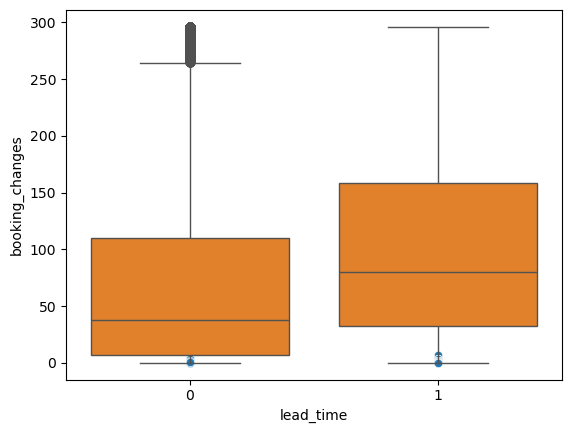

In [157]:
# 9. Are longer lead times associated with fewer booking changes or cancellations?
sns.scatterplot(data=new_df, x='lead_time', y='booking_changes')
sns.boxplot(data=new_df, x='is_canceled', y='lead_time')
plt.show()

In [158]:
#10. What is the typical duration of stay, and how does it vary by customer type or segment?
new_df['stay_duration'] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df.groupby('customer_type')['stay_duration'].mean()


customer_type
Contract           6.040829
Group              2.894640
Transient          3.577412
Transient-Party    3.329884
Name: stay_duration, dtype: float64

In [159]:
# 11. How often are guests upgraded or reassigned to a different room type?
(new_df['reserved_room_type'] != new_df['assigned_room_type']).mean()


0.14891665711337843

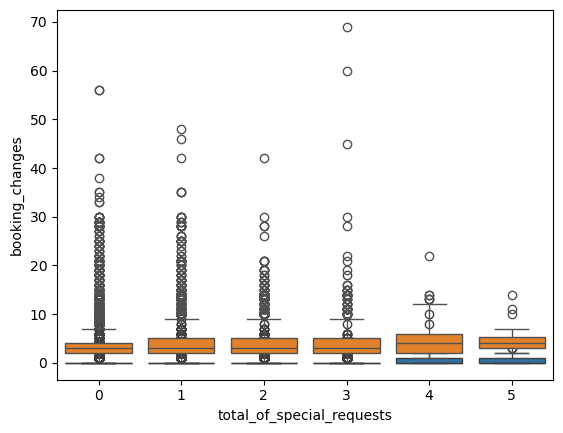

In [160]:
# 12. Are guests who make special requests more likely to experience booking changes or longer stays?
sns.boxplot(data=new_df, x='total_of_special_requests', y='booking_changes')
sns.boxplot(data=new_df, x='total_of_special_requests', y='stay_duration')
plt.show()

In [161]:
# 13. Do certain market segments or distribution channels show higher booking consistency or revenue?
new_df.groupby(['market_segment', 'distribution_channel'])['adr'].mean().unstack()


distribution_channel   Corporate      Direct         GDS       TA/TO  \
market_segment                                                         
Aviation              100.850370         NaN         NaN   95.500000   
Complementary           0.697436    2.521429         NaN    9.694933   
Corporate              67.443072   69.238105         NaN   87.524286   
Direct                 62.899630  115.257896  114.000000  109.852882   
Groups                 68.255940   68.361306         NaN   77.208428   
Offline TA/TO         101.052632   77.633125  119.155227   81.189130   
Online TA              94.092647  101.959219  120.740441  117.292042   
Undefined                    NaN         NaN         NaN         NaN   

distribution_channel  Undefined  
market_segment                   
Aviation                    NaN  
Complementary               NaN  
Corporate                   NaN  
Direct                    62.35  
Groups                      NaN  
Offline TA/TO               NaN  
Online TA                 76.50  
Undefined                 15.00

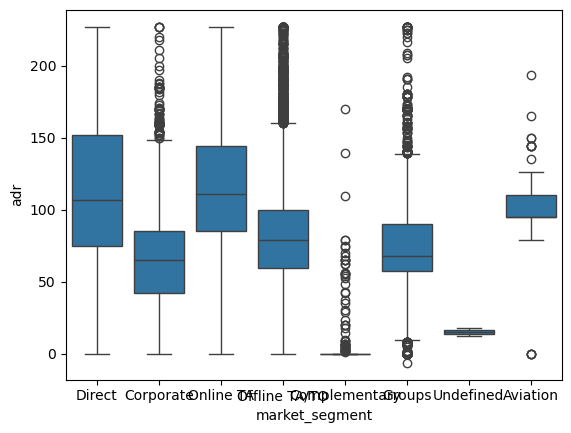

In [162]:
# 14. What factors are most strongly associated with higher ADR?
sns.boxplot(data=new_df, x='market_segment', y='adr')
plt.show()

In [163]:
# 15. Are there customer types or segments consistently contributing to higher revenue?
new_df.groupby('customer_type')['adr'].mean().sort_values(ascending=False)


customer_type
Transient          109.173723
Contract            92.863327
Transient-Party     87.477119
Group               84.020148
Name: adr, dtype: float64

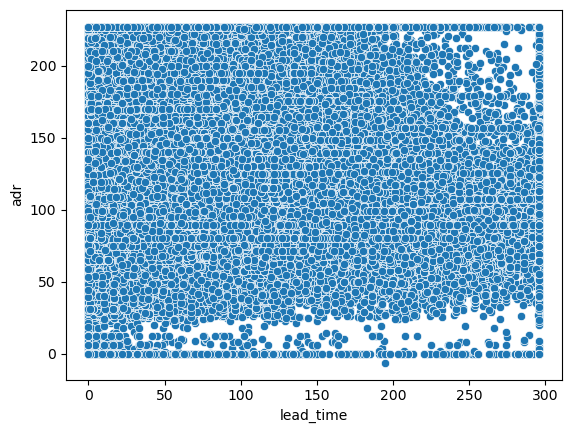

In [164]:
# 16. Do bookings with more lead time or from specific countries yield higher ADR?
sns.scatterplot(data=new_df, x='lead_time', y='adr')
new_df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)
plt.show()

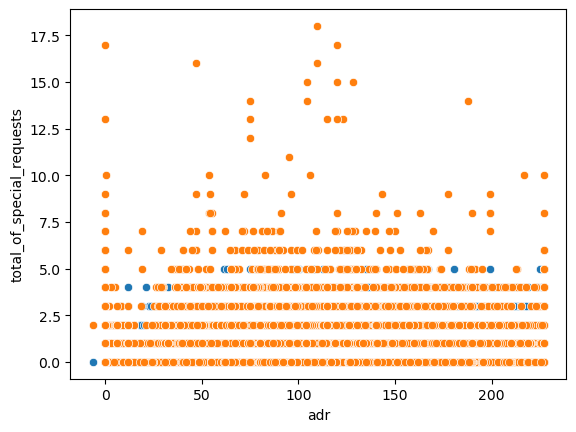

In [165]:
#  17. Are guests with higher ADR more likely to request special services or make booking modifications?
sns.scatterplot(data=new_df, x='adr', y='total_of_special_requests')
sns.scatterplot(data=new_df, x='adr', y='booking_changes')
plt.show()

In [166]:
# 18. Do guests from different countries behave differently in terms of booking timing or stay length?
new_df.groupby('country')[['lead_time', 'stay_duration']].mean().sort_values(by='lead_time', ascending=False).head()


lead_time  stay_duration
country                           
FJI      296.000000       3.000000
LCA      268.000000       5.000000
FRO      254.666667      10.666667
BEN      230.000000       2.333333
MYT      208.000000       3.500000

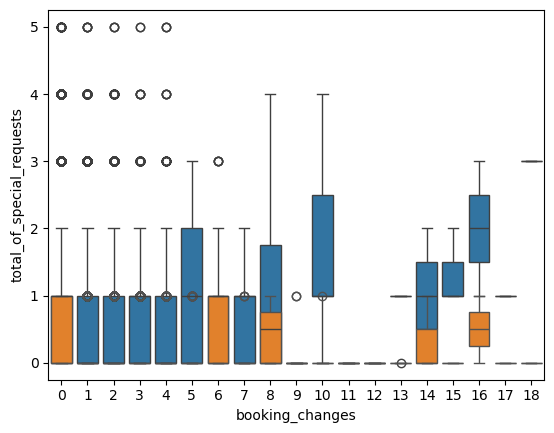

In [167]:
# 19. Are guests who make booking changes more likely to request additional services or cancel?
sns.boxplot(data=new_df, x='booking_changes', y='total_of_special_requests')
sns.boxplot(data=new_df, x='booking_changes', y='is_canceled')
plt.show()

In [273]:
new_df.shape

(87230, 40)